### To see, or not to see,  
## (code):
<div style="text-align: justify"></div>

In [36]:
# create toggle for hiding or displaying raw code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to view/hide the raw code."></form>''')

In [2]:
# hide warning messages
import warnings
warnings.filterwarnings('ignore')

# Re-election Campaign Strategy
## Unsupervised Learning and Hacker Statistics
**Author**: Jan Erish Baluca  
[**LinkedIn**](https://www.linkedin.com/in/jan-erish-baluca-099569103)  
[**Portfolio on Github**](https://github.com/JanErish/Portfolio_von_Jan)

This analysis is based on a presentation prompt from my time at [General Assembly in London](https://generalassemb.ly/education/data-analytics), provided by [**Joana Wang**](https://www.linkedin.com/in/joanawang/):  

> [1] Your work as an analyst has been noticed. You have been asked to join the Governor's re-election effort!  

> [2] For a re-election campaign, the Governor wants to tell a story of the "Tale of Two States" (the Governor got this idea from [New York City Mayor Bill de Blasio's campaign](http://observer.com/2013/01/bill-de-blasio-tells-a-tale-of-two-cities-at-his-mayoral-campaign-kickoff/)). She has asked you to brief the rest of the staff on the differences between eastern and western portions of Washington.  

**The primary goal is to provide useful comparative analyses upon which to build the Governor's re-election campaign strategy.**

**General prompts:** 
>A. Do you agree with the Governor that there are two Washingtons?  
>>a. What are the characteristics of the two Washingtons? (or)  

>>b. Why do you disagree?  

>B. What strategies might the Governor want to employ to address your findings and better her chances for re-election? 

* The data is from the American Community Survey.  
* Each row ID represents a geographic area in the state of Washington, identified by its unique **GEOID**. 
- According to the government website, "GEOIDs are numeric codes that uniquely identify all administrative/legal and statistical geographic areas for which the Census Bureau tabulates data."  
- Each row belongs either to east or west.  

The **secondary goal** of this notebook is to explore the uses of **Unsupervised Machine Learning** techniques in finding value in our data.

The **tertiary goal** of this notebook is to showcase data visualisation using the [**Bokeh visualisation library**](https://bokeh.pydata.org/en/latest/).  

A combination of **markdown** and **HTML** was used to style this notebook.

<center>
<h1><span style="font-size:48px"><span style="font-family:Times New Roman,Times,serif"><tt>A Tale of Two Cities</tt></span></span></h1></p>
</center>

![Imgur](https://i.imgur.com/JNhx48T.jpg)


<center> The Governor of Washington asked that we examine the differences between the Eastern and Western regions of Washington.  

We need to find out if there are indeed two Washingtons when split between East and West. </center>

# Table of Contents 

1. [Exploratory Data Analysis (EDA)](#eda)  
    1.1 [East vs. West](#evw)  
    1.2 [Bokeh Plots](#bok)
2. [Unsupervised Learning: KMeans Clustering](#kmc)  
    2.1 [t-Distributed Stochastic Neighbor Embedding](#tsne)  
    2.2 [Decision Tree](#dtree)  
    2.3 [Clustering Stats](#clust)  
3. [Strategy Recommendations](#strat)  
    3.1 [East and West](#eaw)  
      3.1.1 [Strategy: Capital Movement](#cmove)  
      3.1.2 [Strategy: Targeted Campaigning](#tcamp)  
    3.2 [Rural and Urban](#rau)  
      3.2.1 [Strategy: Urbanization](#urb)  
      3.2.2 [Strategy: Targeted Campaigning<sup>2</sup>](#tcamp2)  
4. [Densification](#den)  
    4.1 [Pearson r correlation: Density vs. Poverty and Unemployment Rates](#pear)  
    4.2 [Linear Regression Predictor: Density and Mean Income](#lin)  
    4.3 [Comparing Low-density and High-Density](#lowhi)  
      4.3.1 [Hacker Statistics: Permutation Test](#perm)  
      4.3.2 [Hacker Statistics: Boostrap Test](#boot)  
    4.4 [Density: Conclusion](#conc)  
    4.5 [Policy Recommendations](#pol)  
5. [Coming Soon: Interactive Tableau Map](#map)  
6. [Further Data Recommendations](#rec)  
7. [Principal Component Analysis](#pca)  
8. [Summary](#sum)
9. [Sources](#sour)

<a id="eda"></a>
# Exploratory Data Analysis (EDA)

After importing the data, and before performing analyses on the data, it is important to explore the very condition of our dataset first.

Our dataset has 40 columns, 36 of which are numeric.    
The non-numeric columns are:  
1. ID (GEOID)
2. density_group
3. county
4. region 

Notice that there are **missing values**. We will deal with these later.


## Descriptive statistics
The pandas module easily provides summary statistics of our dataset, which has been converted to a pandas DataFrame.  
Simply performing descriptive statistics doesn't tell us much, but a quick look tells us that:  
> 1. The size difference between the geographically smallest area and the largest area is huge.
>> It will be useful to visualize the distribution later.

> 2. Population densities vary greatly.
>> This will probably have to be taken into serious consideration while comparing other features of the eastern and western regions.

> 3. There are features with minimum values of 0.00.
>> Considering the differences in geographic size and population density, we will have to be careful when dealing with these values.  

In [3]:
# importing essential modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from bokeh.models.widgets import Panel, Tabs
from bokeh.transform import dodge
from bokeh.core.properties import value
import seaborn as sns

# importing the dataset
df = pd.read_excel('L4_reelection_activity.xlsx', sheetname='2014_acs_select')

# data exploration
# df.info()

In [4]:
df.describe()

,Estimate; Median age -- - Total:,Estimate; Median age -- - Male,Estimate; Median age -- - Female,Total; Estimate; Total population,Male; Estimate; Total population,Female; Estimate; Total population,% Male; Population,% Female; Population,Total; Estimate; Workers 16 years and over,% Workers over 16,...,% age 18-64,% age 65+,Percent below poverty level; Estimate; AGE - 18 to 64 years,Mean income (dollars); Estimate; All households,Total; Estimate; Households,Median income (dollars); Estimate; Households,Total; Estimate; Population 16 years and over,Unemployment rate; Estimate; Population 16 years and over,area_sqkm,density
count,1445.000000,1444.000000,1443.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,...,1445.000000,1445.000000,1444.000000,1443.000000,1445.000000,1443.000000,1445.000000,1444.000000,1445.000000,1445.000000
mean,38.750173,37.911704,39.671310,4774.479585,2383.050519,2391.429066,0.500578,0.499422,2194.600000,0.456923,...,0.624000,0.154397,0.134756,78235.677062,1830.723875,63532.108801,3797.950173,0.091722,123.809188,1223.235773
std,7.019437,7.159362,7.375284,1776.734256,894.549816,915.678306,0.041271,0.041271,911.246754,0.081272,...,0.075923,0.087278,0.096917,31731.934737,707.463444,25268.949078,1379.045900,0.042923,436.445781,1558.980391
min,19.500000,16.600000,19.500000,23.000000,8.000000,0.000000,0.347826,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,16868.000000,0.000000,5938.000000,16.000000,0.000000,0.229061,0.019716
25%,34.100000,33.100000,34.900000,3552.000000,1768.000000,1749.000000,0.478413,0.481670,1560.000000,0.411033,...,0.589192,0.103178,0.068000,57064.000000,1357.000000,45833.000000,2868.000000,0.061000,2.624440,161.407980
50%,38.500000,37.400000,39.400000,4635.000000,2303.000000,2317.000000,0.499580,0.500420,2133.000000,0.454657,...,0.625314,0.138989,0.111500,72237.000000,1755.000000,59325.000000,3670.000000,0.084000,5.373849,888.332112
75%,43.000000,42.200000,44.500000,5874.000000,2929.000000,2944.000000,0.518330,0.521587,2778.000000,0.499446,...,0.660182,0.182018,0.174250,92510.000000,2259.000000,77061.000000,4687.000000,0.115250,27.654943,1733.541375
max,64.600000,65.200000,65.100000,12914.000000,6953.000000,6025.000000,1.000000,0.652174,5974.000000,0.963075,...,0.938381,1.000000,0.828000,310533.000000,5009.000000,188077.000000,8400.000000,0.316000,4629.302949,20631.109863


In [5]:
# Handling missing values: Mean Strategy Imputation 
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer = imputer.fit(df.iloc[:,1:-5])
df.iloc[:,1:-5] = imputer.transform(df.iloc[:,1:-5])

In [6]:
# adding calculated fields
# Poverty
df['Poverty'] = df['Percent below poverty level; Estimate; Population for whom poverty status is determined'] * df['Total; Estimate; Population for whom poverty status is determined']

# income groups
bins = [0, 19000,35000, 100000, 350000, 1000000]
labels = ['Lower', 'Lower Middle', 'Middle Middle', 'Upper Middle', 'Upper']
df['income_group'] = pd.cut(df['Median income (dollars); Estimate; Households'],
                            bins=bins, labels=labels)
# poverty density
df['Poverty_Density'] = (df['Percent below poverty level; Estimate; Population for whom poverty status is determined'] * df['Total; Estimate; Population for whom poverty status is determined'])\
                        /df['area_sqkm']
# unemployed
df['unemployed'] = df['Total; Estimate; Population 16 years and over'] * df['Unemployment rate; Estimate; Population 16 years and over']

# higher education
df['with_Bach'] = df['Total; Estimate; Total population'] * df['Total; Estimate; Percent bachelor\'s degree or higher']
#df['with_Bach_male'] = df['Total; Estimate; Total population'] * df['Male; Estimate; Percent bachelor\'s degree or higher'] 
#df['with_Bach_female'] = df['Total; Estimate; Total population'] * df['Female; Estimate; Percent bachelor\'s degree or higher']
df['gender_educ_gap'] = df['Male; Estimate; Percent bachelor\'s degree or higher'] - df['Female; Estimate; Percent bachelor\'s degree or higher']

# splitting the data between East and West
E = df[df['region'] == 'East']
W = df[df['region'] == 'West']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 46 columns):
Id                                                                                         1445 non-null object
Estimate; Median age -- - Total:                                                           1445 non-null float64
Estimate; Median age -- - Male                                                             1445 non-null float64
Estimate; Median age -- - Female                                                           1445 non-null float64
Total; Estimate; Total population                                                          1445 non-null float64
Male; Estimate; Total population                                                           1445 non-null float64
Female; Estimate; Total population                                                         1445 non-null float64
% Male; Population                                                                         1445 non-nul

## Empirical Cumulative Distribution Function (ECDF)

<div style="text-align: justify">In comparing our two regions, the distribution of individual features is graphed using an **empirical cumulative distribution function**. Simply put, the **ECDF** gives us the cumulative distribution for any value of *x*. The value of *y* is the probability of *x* and below. 1-*y* is the probability of of values greater than *x*.
![Imgur](https://i.imgur.com/kKUSM4a.png)
*Above is an ECDF of a Gaussian (Normal) distribution: At x = 0.0, y = 0.5. Therefore, 50% of the observations have a value of x less than or equal to 0.0.*  
</div>
<a id="bok"></a>
## Bokeh plots: Move It, Groove It

* For this notebook, I have chosen the Bokeh visualization library in creating dynamic and interactive dashboards.  
* Hovering over a data point in the graph will reveal its X and Y axis values.  
- There is also a toolbox on the right side of the graphs that allows panning and zooming.  
- The axes can be rescaled by hovering over the respective edge and using the activated wheel zoom tool.  
- Each plot on a dashboard can be viewed by clicking on its respective tab. 

In [7]:
# to make the bokeh apps appear on this notebook instead of producing an html file:
output_notebook()

# define a function for creating graphs
def fig(title, xaxislabel, yaxislabel, xlinecolor='white', ylinecolor='white'):
        f = figure(background_fill_color='#DFDFE5', plot_width=650, plot_height=450)
        f.xgrid.grid_line_color= xlinecolor
        f.ygrid.grid_line_color= ylinecolor
        f.xaxis.axis_label= xaxislabel
        f.yaxis.axis_label= yaxislabel
        f.title.text = title
        f.title.align = "center"
        f.title.text_font_size = "23px"
        f.add_tools(HoverTool(tooltips=[(xaxislabel, "$x"), (yaxislabel, "$y")]))
        
        return f

# define a function for creating ecdf features
def ecdf(input):
    x = np.sort(input)
    y = np.arange(1, len(x)+1) / len(x)
    
    return x, y

# Area
Area = fig("Area: East vs. West",'Area sqkm', 'ECDF')
xE, yE = ecdf(E['area_sqkm'])
Area.circle(xE, yE, size=7, alpha=0.5, legend='East', color='tomato')
xW, yW = ecdf(W['area_sqkm'])
Area.circle(xW, yW, size=7, alpha=0.5, legend='West', color='dodgerblue')
Area.legend.location="bottom_right"
tab1 = Panel(child=Area, title='Area')

# Total Population
Totpop = fig("Total Population: East vs. West", 'Population', 'ECDF')
xE, yE = ecdf(E['Total; Estimate; Total population'])
Totpop.circle(xE, yE, size=7, alpha=0.5, legend='East', color='tomato')
xW, yW = ecdf(W['Total; Estimate; Total population'])
Totpop.circle(xW, yW, size=7, alpha=0.5, legend='West', color='dodgerblue')
Totpop.legend.location="bottom_right"
tab2 = Panel(child=Totpop, title ='Total Population')

# Population Density
Popden = fig("Population Density: East vs. West", "Population Density", "ECDF")
xE, yE = ecdf(E['density'])
Popden.circle(xE, yE, size=7, alpha=0.5, legend='East', color='tomato')
xW, yW = ecdf(W['density'])
Popden.circle(xW, yW, size=7, alpha=0.5, legend='West', color='dodgerblue')
Popden.legend.location="bottom_right"
tab3 = Panel(child=Popden, title ='Population Density')

# Population Density Groups
# Grouping and aggregating
dg = df.loc[:,['region', 'density_group', 'Id']]
dg = dg.groupby(['region','density_group']).count()
dg = dg.pivot_table(index='region',columns='density_group',values='Id',aggfunc='sum')
# Bokeh Histogram of Density Group Distribution
source = ColumnDataSource(data=dg)
Dengroup = figure(x_range=['East','West'], y_range=(0,dg.values.max()+ 10),background_fill_color='#DFDFE5',
                  plot_width=650, plot_height=450, title='Population Density Groups: East vs. West')
Dengroup.xgrid.grid_line_color= 'white'
Dengroup.ygrid.grid_line_color= 'white'
Dengroup.legend.location= "upper_left"
Dengroup.legend.orientation = 'horizontal'
Dengroup.title.align = "center"
Dengroup.title.text_font_size = "23px"
Dengroup.vbar(x=dodge('region', -0.25, range=Dengroup.x_range), top='Low', width=0.2, source=source,
             color="#c9d9d3", legend=value("Low"))
Dengroup.vbar(x=dodge('region', 0.0, range=Dengroup.x_range), top='Medium', width=0.2, source=source,
             color="#718dbf", legend=value("Medium"))
Dengroup.vbar(x=dodge('region', 0.25, range=Dengroup.x_range), top='High', width=0.2, source=source,
             color="#e84d60", legend=value("High"))
Dengroup.x_range.range_padding= 0.1
tab4 = Panel(child=Dengroup, title='Density Group')

# Age groups
# Grouping and aggregating
ag = df.loc[:,['region','% under 18','% age 18-64','% age 65+']]
ag = ag.groupby('region').mean()
# Bokeh Histogram of Density Group Distribution
source = ColumnDataSource(data=ag)
Agegroup = figure(x_range=['East','West'], y_range=(0,ag.values.max()+ 0.10),background_fill_color='#DFDFE5',
                  plot_width=650, plot_height=450, title='Mean % of Age Groups: East vs. West')
Agegroup.xgrid.grid_line_color= 'white'
Agegroup.ygrid.grid_line_color= 'white'
Agegroup.legend.location= "upper_left"
Agegroup.legend.orientation = 'horizontal'
Agegroup.title.align = "center"
Agegroup.title.text_font_size = "23px"
Agegroup.vbar(x=dodge('region', -0.25, range=Agegroup.x_range), top='% under 18', width=0.2, source=source,
             color="#c9d9d3", legend=value("% under 18"))
Agegroup.vbar(x=dodge('region', 0.0, range=Agegroup.x_range), top='% age 18-64', width=0.2, source=source,
             color="#718dbf", legend=value("% age 18-64"))
Agegroup.vbar(x=dodge('region', 0.25, range=Agegroup.x_range), top='% age 65+', width=0.2, source=source,
             color="#e84d60", legend=value("% age 65+"))
Agegroup.x_range.range_padding= 0.1
agegroup = Panel(child=Agegroup, title='Mean % of Age Groups')

layout1 = Tabs(tabs=[tab1, tab2, tab3, tab4, agegroup])
show(layout1)
            
# some summary statistics between regions
EvW_count = df.loc[:,['region','Id']].groupby('region').count()
EvW_total_area =  df.loc[:,['region','area_sqkm']].groupby('region').sum()
EvW_perc_area = EvW_total_area / df['area_sqkm'].sum()
EvW_total_pop = df.loc[:,['region','Total; Estimate; Total population']].groupby('region').sum()
EvW_perc_pop = EvW_total_pop / df.loc[:,'Total; Estimate; Total population'].sum()
EvW = pd.concat([EvW_count, EvW_total_area, EvW_perc_area, EvW_total_pop, EvW_perc_pop], axis=1)
EvW.columns = ['Total GEOIDs', 'Total area in sqkm','% of Washington\'s area','Total population','% of Washington\'s pop']
EvW

Loading BokehJS ...

,Total GEOIDs,Total area in sqkm,% of Washington's area,Total population,% of Washington's pop
region,,,,,
East,305,103688.130930,0.579573,1481519.0,0.21474
West,1140,75216.145293,0.420427,5417604.0,0.78526


<a id="evw"></a>
# East vs. West
<span style="font-size:20px"><strong><span style="color:#b22222">
Area and Population
    </span></strong></span>  
East Washington, despite having much less GEOIDs belonging to it, is still geographically larger (58% of Washington's area).   
East Washington also has more of GEOIDs with larger areas, with roughly a fifth of them (20%) greater than 300 sqkm in area. Only roughly 5% of the West (57 GEOIDs) have an area greater than 300 sqkm.  

Looking at the total population, the distribution in the East is skewed towards large-population GEOIDs, but 78.53% of the total population of Washington resides in the West.  

<span style="font-size:20px"><strong><span style="color:#b22222">
Density
    </span></strong></span>  
To take out analysis to another level, let us look at the relationship of these two features in each region.  

> Density = Population / Area

If you only look at the shape of the distribution and ignore the sheer number of GEOIDs assigned in the West, the ECDF and Bar chart for density groups reveal that **the East is dominantly low-density and the West is dominantly high-density.**

But, the visualizations also reveal that while **most of the denser GEOIDs belong to the West**, **_most of the less dense ones also belong to the West_**. Moreover, there is still a portion of very dense populations that belong to the East. 


In [8]:
# Poverty
# notice that not every GEOID has all of its citizens' poverty status determined
# save a few outliers, the percentage of those whose poverty status is unknown is very low anyway

# Poverty total
Pov = fig('Poverty: East vs. West', 'Poverty', 'ECDF')
xE, yE = ecdf(E['Poverty'])
Pov.circle(xE, yE, size=7, alpha=0.5, legend='East', color='tomato')
xW, yW = ecdf(W['Poverty'])
Pov.circle(xW, yW, size=7, alpha=0.5, legend='West', color='dodgerblue')
Pov.legend.location="bottom_right"
tab5 = Panel(child=Pov, title='Poverty')

# Poverty Density
Povden = fig('Poverty Density: East vs. West', 'Poverty Density', 'ECDF')
xE, yE = ecdf(E['Poverty_Density'])
Povden.circle(xE, yE, size=7, alpha=0.5, legend='East', color='tomato')
xW, yW = ecdf(W['Poverty_Density'])

Povden.circle(xW, yW, size=7, alpha=0.5, legend='West', color='dodgerblue')
Povden.legend.location="bottom_right"
tab6 = Panel(child=Povden, title='Poverty Density')

# Poverty Rate ECDF
Pov_rate = fig("Poverty Rate: East vs. West", "Poverty Rate", "ECDF")
xE, yE = ecdf(E['Percent below poverty level; Estimate; Population for whom poverty status is determined'])
Pov_rate.circle(xE, yE, size=7, alpha=0.5, legend='East', color='tomato')
xW, yW = ecdf(W['Percent below poverty level; Estimate; Population for whom poverty status is determined'])
Pov_rate.circle(xW, yW, size=7, alpha=0.5, legend='West', color='dodgerblue')
Pov_rate.legend.location="bottom_right"
pov_rate = Panel(child=Pov_rate, title ='Poverty Rate')

#Income Groups
# Grouping and aggregating
ig = df.loc[:,['region', 'income_group', 'Id']]
ig = ig.groupby(['region','income_group']).count()
ig = ig.pivot_table(index='region',columns='income_group',values='Id',aggfunc='sum')
# Histogram for Income Group Distribution
incgroup = ColumnDataSource(data=ig)
Incgroup = figure(x_range=['East','West'], y_range=(-50,ig.values.max()+ 10),background_fill_color='#DFDFE5',
                  plot_width=650, plot_height=450, title='Median Income Distribution: East vs. West')
Incgroup.xgrid.grid_line_color= 'white'
Incgroup.ygrid.grid_line_color= 'white'
Incgroup.legend.location= "top_left"
Incgroup.legend.orientation = 'horizontal'
Incgroup.title.align = "center"
Incgroup.title.text_font_size = "23px"
Incgroup.vbar(x=dodge('region', -0.25, range=Incgroup.x_range), top='Lower', width=0.175, source=incgroup,
             color="#B22222", legend=value('Lower'))
Incgroup.vbar(x=dodge('region', -0.10, range=Incgroup.x_range), top='Lower Middle', width=0.175, source=incgroup,
             color="#ADD8E6", legend=value('Lower Middle'))
Incgroup.vbar(x=dodge('region', 0.10, range=Incgroup.x_range), top='Middle Middle', width=0.175, source=incgroup,
             color="#6A5ACD", legend=value('Middle Middle'))
Incgroup.vbar(x=dodge('region', 0.25, range=Incgroup.x_range), top='Upper Middle', width=0.175, source=incgroup,
             color="#191970", legend=value('Upper Middle'))
Incgroup.x_range.range_padding= 0.1
incgroup_tab = Panel(child=Incgroup, title='Income Group')

# unemployment rate
Unemp_rate = fig('Unemployment Rate: East vs. West', 'Unemployment Rate', 'ECDF')
xE, yE = ecdf(E['Unemployment rate; Estimate; Population 16 years and over'])
Unemp_rate.circle(xE, yE, size=7, alpha=0.5, legend='East', color='tomato')
xW, yW = ecdf(W['Unemployment rate; Estimate; Population 16 years and over'])
Unemp_rate.circle(xW, yW, size=7, alpha=0.5, legend='West', color='dodgerblue')
Unemp_rate.legend.location="bottom_right"
unemp_rate_tab = Panel(child=Unemp_rate, title='Unemployment Rate')

# unemployed
Unemp = fig('Unemployed: East vs. West','Unemployed', 'ECDF')
xE, yE = ecdf(E['unemployed'])
Unemp.circle(xE, yE, size=7, alpha=0.5, legend='East', color='tomato')
xW, yW = ecdf(W['unemployed'])
Unemp.circle(xW, yW, size=7, alpha=0.5, legend='West', color='dodgerblue')
Unemp.legend.location="bottom_right"
unemp_tab = Panel(child=Unemp, title='Unemployed')
# not much difference between East and West when it comes to either unemployment rate and total unemployed

# education: identify the places where the educated people reside
# Percent higher-education
Perc_high = fig('% with Higher Education: East vs. West','Percent with Higher Education', 'ECDF')
xE, yE = ecdf(E['Total; Estimate; Percent bachelor\'s degree or higher'])
Perc_high.circle(xE, yE, size=7, alpha=0.5, legend='East', color='tomato')
xW, yW = ecdf(W['Total; Estimate; Percent bachelor\'s degree or higher'])
Perc_high.circle(xW, yW, size=7, alpha=0.5, legend='West', color='dodgerblue')
Perc_high.legend.location="bottom_right"
perc_high = Panel(child=Perc_high, title='% with Higher Education')
# Total constituents with Higher Education
With_high = fig('Total with Higher Education: East vs. West','Total with Higher Education', 'ECDF')
xE, yE = ecdf(E['with_Bach'])
With_high.circle(xE, yE, size=7, alpha=0.5, legend='East', color='tomato')
xW, yW = ecdf(W['with_Bach'])
With_high.circle(xW, yW, size=7, alpha=0.5, legend='West', color='dodgerblue')
With_high.legend.location="bottom_right"
with_high = Panel(child=With_high, title='Total with Higher Educ')
# Gender higher education gap: Male % - Female %
High_gap = fig('Total with Higher Education: East vs. West','Total with Higher Education', 'ECDF')
xE, yE = ecdf(E['gender_educ_gap'])
High_gap.circle(xE, yE, size=7, alpha=0.5, legend='East', color='tomato')
xW, yW = ecdf(W['gender_educ_gap'])
High_gap.circle(xW, yW, size=7, alpha=0.5, legend='West', color='dodgerblue')
High_gap.legend.location="bottom_right"
high_gap = Panel(child=High_gap, title='Gender Educ Gap')

# transportation stats:
# % median
tperc = df.loc[:,['region','% drove alone', '% carpool', '% public transit']]
tperc = tperc.groupby('region').median()
source = ColumnDataSource(data=tperc)
Transperc = figure(x_range=['East','West'], y_range=(0,tperc.values.max()+ 0.1),background_fill_color='#DFDFE5',
                  plot_width=650, plot_height=450, title='% Transportation Modes: East vs. West')
Transperc.xgrid.grid_line_color= 'white'
Transperc.ygrid.grid_line_color= 'white'
Transperc.legend.location= "upper_left"
Transperc.legend.orientation = 'horizontal'
Transperc.title.align = "center"
Transperc.title.text_font_size = "23px"
Transperc.vbar(x=dodge('region', -0.25, range=Transperc.x_range), top='% drove alone', width=0.2, source=source,
             color="#c9d9d3", legend=value("% drove alone"))
Transperc.vbar(x=dodge('region', 0.0, range=Transperc.x_range), top='% carpool', width=0.2, source=source,
             color="#718dbf", legend=value("% carpool"))
Transperc.vbar(x=dodge('region', 0.25, range=Transperc.x_range), top='% public transit', width=0.2, source=source,
             color="#e84d60", legend=value("% public transit"))
Transperc.x_range.range_padding= 0.1
transperc = Panel(child=Transperc, title='% Transportation Modes')

# totals
ttot = df.loc[:,['region','Car, truck, or van -- drove alone; Estimate; Workers 16 years and over',
                  'Car, truck, or van -- carpooled; Estimate; Workers 16 years and over',
                  'Public transportation (excluding taxicab); Estimate; Workers 16 years and over']]
ttot = ttot.groupby('region').median()
source = ColumnDataSource(data=ttot)
Transtotal = figure(x_range=['East','West'], y_range=(0,ttot.values.max()+ 50),background_fill_color='#DFDFE5',
                  plot_width=650, plot_height=450, title='Total Transportation Modes: East vs. West')
Transtotal.xgrid.grid_line_color= 'white'
Transtotal.ygrid.grid_line_color= 'white'
Transtotal.legend.location= "upper_left"
Transtotal.legend.orientation = 'horizontal'
Transtotal.title.align = "center"
Transtotal.title.text_font_size = "23px"
Transtotal.vbar(x=dodge('region', -0.25, range=Transtotal.x_range),
                top='Car, truck, or van -- drove alone; Estimate; Workers 16 years and over', width=0.2, source=source,
             color="#c9d9d3", legend=value("Total drove alone"))
Transtotal.vbar(x=dodge('region', 0.0, range=Transtotal.x_range),
                top='Car, truck, or van -- carpooled; Estimate; Workers 16 years and over', width=0.2, source=source,
             color="#718dbf", legend=value("Total carpool"))
Transtotal.vbar(x=dodge('region', 0.25, range=Transtotal.x_range),
                top='Public transportation (excluding taxicab); Estimate; Workers 16 years and over', width=0.2, source=source,
             color="#e84d60", legend=value("Total public transit"))
Transtotal.x_range.range_padding= 0.1
transtotal = Panel(child=Transtotal, title='Total Transportation Modes')

layout2 = Tabs(tabs=[tab5, tab6, pov_rate, incgroup_tab, unemp_rate_tab, unemp_tab, perc_high, with_high, high_gap, transperc,
                    transtotal])
show(layout2)

Poverty_Total = pd.DataFrame(df.groupby('region')['Poverty'].sum())
Unemployed = pd.DataFrame(df.groupby('region')['unemployed'].sum())
Total_Unemployed = df['unemployed'].sum()
Unemployed['% unemployed'] = Unemployed['unemployed'] / Total_Unemployed
Unemp_rate = pd.DataFrame(df.groupby('region')['Unemployment rate; Estimate; Population 16 years and over'].mean())
Poverty_rate = pd.DataFrame(df.groupby('region')['Percent below poverty level; Estimate; Population for whom poverty status is determined'].mean())
EastWest = pd.concat([Unemployed, Unemp_rate, Poverty_Total, Poverty_rate], axis=1)
EastWest.columns = ['Total unemployed','% Washington\'s unemployed','Mean unemployment rate','Total below poverty line','Mean poverty rate']
EastWest

,Total unemployed,% Washington's unemployed,Mean unemployment rate,Total below poverty line,Mean poverty rate
region,,,,,
East,103482.307925,0.209283,0.091137,259180.121,0.182888
West,390979.964000,0.790717,0.091879,657189.557,0.128513


<span style="font-size:20px"><strong><span style="color:#b22222">
Poverty
    </span></strong></span>  
<p><div style="text-align: justify">
**GEOIDs with the highest numbers of constituents below poverty line are mostly found in the East, although plenty of them are also in the West.**  
</div>
<p>
<div style="text-align: justify">    
Looking at the **density** instead of the total reveals that while the distributions are mostly identical, *__in the West are some GEOIDs with very high concentrations of poverty.__*
</div><div style="text-align: justify">
Also, **more than 2/3 of constituents below poverty line are in the West.**  
<br>
  
<span style="font-size:20px"><strong><span style="color:#b22222">
Income
    </span></strong></span>  
<p><div style="text-align: justify">
The data provides only two measures of central tendency (mean and mode) of income in every GEOID. These values do not provide information on the distribution of income within each GEOID, although we do have some idea of it through the data on poverty. Also, notice that the income is per household, not per individual. To graph the distribution, I chose to split the *medians* into categories. I chose the medians instead of the means because medians are less sensitive to skewedness and thus, they probably better reflect the distributions in each GEOID. The categories are as follows:  
</div></p>  

1. Lower = median < $19,000

2. Lower Middle = $19,000 <= median < $35,000  

3. Middle Middle = $35,000 <= median < $100,000  

4. Upper Middle = $100,000 <= median < $350,000  

5. Upper = median > $350,000  

<p><div style="text-align: justify">
Despite having 5 income group categories based on thresholds commonly used in the US, the graph only contains 4 categories. This is because none of the medians fell into the Upper class bin, which is understandable since we used the modes and constituents who belong to the Upper class are very few compared to the rest.  
<p><div style="text-align: justify">
Looking at the bar graph, we can see that significantly **most of the GEOIDs whose medians fell in the middle middle class are in the West. Almost all of the medians in the Upper Middle class are also in the West, while they barely differ in Lower Middle and Lower class distribution.**  

<span style="font-size:20px"><strong><span style="color:#b22222">
Unemployment
    </span></strong></span>  
<div style="text-align: justify">
<p><div style="text-align: justify">
For both the unemployment rate and total unemployed constituents, **the distributions of GEOIDs with lower to medium unemployment rates and total unemployed are quite similar, but the West has a significant amount of GEOIDs with extreme levels of unemployment. As a result, 79% of the unemployed are in the West.** This is also a result of more GEOIDs belonging to the West in the first place.
</div>

<span style="font-size:20px"><strong><span style="color:#b22222">
Higher Education
    </span></strong></span>  
<div style="text-align: justify">
<p><div style="text-align: justify">
The two graphs show that **the West has more of the GEOIDs with very high percentages of those with at least a Bachelor's degree and those with high total of constituents with at least a Bachelor's degree.**    
<p><div style="text-align: justify">
The data also provides separate percentages for males and females with higher education. There are no notes to tell us to which this percentage belongs, but let us assume that they are percentages of their respective gender's total population. By using the percentages instead of the raw numbers, we can account for the difference between the totals of male and female populations.  
</div>

> Gap = Percent; Male - Percent; Female  


>> -A *positive* value indicates that males, proportionally, have a higher rate of higher education.  
>> -A *negative* value indicates that females, proportionally, have a higher rate of higher education.  

<br>
<div style="text-align: justify">
By graphing this difference, we can tell that **while the West has a higher distribution of GEOIDs with  a high positive gap, it also has the higher distribution of very negative graphs, which means it has more GEOIDs where females have a higher rate of higher education.**  
</div>
<br>
<span style="font-size:20px"><strong><span style="color:#b22222">
Transportation
    </span></strong></span>  
<div style="text-align: justify">
In describing the prevalence of modes of transportation, the medians for each region were used as medians are less sensitive to outliers (rare cases with extreme values). The graph shows that **a huge majority of constituents in Washington drive alone**. The proportions of workers who drove alone or carpooled are quite similar between the regions. Take note however that while the East has a higher proportion of workers who drive alone, the **West has slightly more of the total number of workers who drive alone in Washington.**

**The West has a higher proportion of workers who use public transportation**.  
</div>

# Highest Poverty vs. Highest Poverty Density  
<p>
<div style="text-align: justify"> To further highlight the importance of looking at density, let us look at the GEOIDs with the highest total constituents below poverty line and the GEOID with the highest concentration of constituents below poverty line:
</div>

In [9]:
# check out the details of the location of these two GEOIDs
# what is that GEOID with the highest poverty density?!?!?!
Highest_Pov = pd.DataFrame(df.loc[df['Poverty'].idxmax()])
Highest_Povden = pd.DataFrame(df.loc[df['Poverty_Density'].idxmax()])
Comparing_Pov = pd.concat([Highest_Pov,Highest_Povden], axis=1)
Comparing_Pov = Comparing_Pov.reset_index()
Comparing_Pov.set_index('index', inplace=True)
Comparing_Pov.columns = ['Highest Poverty', 'Highest Poverty Density']
Comparing_Pov

,Highest Poverty,Highest Poverty Density
index,,
Id,1400000US53075000600,1400000US53033005301
Estimate; Median age -- - Total:,22.3,21.6
Estimate; Median age -- - Male,22.8,21.8
Estimate; Median age -- - Female,21.7,21.3
Total; Estimate; Total population,6812,6619
Male; Estimate; Total population,3470,3102
Female; Estimate; Total population,3342,3517
% Male; Population,0.509395,0.468651
% Female; Population,0.490605,0.531349


<img style="float: right;" src="https://imgur.com/pGBOdJM.jpg" width="350"> 
The GEOID with the most constituents below poverty line is in Whitman County in the East (country).  

The GEOID with the highest poverty density is in King County, Seattle in the West (city).  
Notice how they have nearly the same population size but one is packed in 0.65% of the area of the other.

They almost have the same Poverty rate, with the Eastern one slightly higher by just 6%. Notice, however, that in the Western one, only we do not know the poverty status (below or above the poverty line) of 34% of its population. There are 90.29 times more constituents below poverty line per square kilometer (poverty density) in the Western one and there are 71.10% more constituents under poverty line in the Eastern one.

Both their median incomes belong to the Low income group, and they have almost similar education levels.
<img style="float: right;" src="https://imgur.com/yGp8Far.jpg" width="350">  
The Western one has an older population. It also has 6.6% more unemployment rate and 62% more unemployed. This could be because of the older population in the West, as the unemployment rate seems to count also those who are 65+ years old. 

In the Eastern one, the rate of higher education (at least a Bachelor's degree) for males is higher than for females by 14%, while it's only higher by 0.8% in the Western one.

**We must realize, however, that GOEIDs with similar to the two above can be found on either size of the geographic divide.**  

# East and west are not the same, but--
<div style="text-align: justify">
<br>
-- focusing on their stark differences, especially when it comes to income distribution and education levels, risks effectively ignoring differences not too obvious. Remember how this divide largely downplays density.   
<br>
_The reason behind finding a possible divide in Washington DC is that we need to pinpoint a problem, and then offer up a solution._  
<br>
**The most glaring difference between the two is that the overwhelming majority of the affluent (middle middle, upper middle) GEOIDs are in the West.** But is it sufficient as a basis of our strategy?  How about other possible dichotomies?
</div>

# Let's go back
<p><div style="text-align: justify">  
Identifying the problem as precisely as possible is essential to actually providing a solution. We need to spend as much as we can understanding the data until we have a concrete, specific definition of the problem we are trying to solve.
</div></p>

<img src="https://imgur.com/ay9kagj.png" width="400">

Since we are not too sure about our problem at hand yet even after exploring and processing our data, we need to return to our data, best from a different angle.

The question now is, **_how should we look at the data this time?_**

<center>
<h1><span style="font-size:36px"><span style="font-family:Times New Roman,Times,serif"><tt>Let's ask Artificial Intelligence!</tt></span></span></h1>
</center>
>> ##### What are the two cities in Washington's tale?

<a id="kmc"></a>
# Unsupervised Learning: KMeans Clustering
<p><div style="text-align: justify">
Machine learning involves feeding data to an algorithm. The machine learning algorithm not only remembers the data, but learns relationships and patterns within the data hidden from plain sight. Having learned the data, we can then use the algorithm to extract useful information from the data or to make predictions on data that the algorithm has never seen before. The latter is called Supervised Learning. It makes predictions on a specified feature on the data based on its relationship with the rest of the features with the data. It can place new data in specified categories or forecast the numerical value of a specific missing variable in new data.  
</div></p>
<p><div style="text-align: justify">
What we need to do first, however, is **_Unsupervised_ Learning**.  
Categorizing with Supervised Learning involves categories that already exist in the historical data. Categorizing or "clustering" with Unsupervised Learning involves the machine learning algorithm itself creating new unspecified categories for the data based on the rest of the categories. The only parameter we need to specify is the _number_ of categories or "clusters" we want the algorithm to define. What defines those clusters will be up to what the algorithm learns from the data.  
</div></p>
<p><div style="text-align: justify">
**But how are these clusters determined?**  
With our specific method, k-means clustering, "means" are the centroids (cluster centers), which are represented by the means (averages) of the values along each dimension (feature or variable) for instances (in our case, GEOIDs) in the cluster. "k" is simply the number of clusters we want. It starts by creating the initial centroids randomly (it can be specified but for our purposes, there will be no need). The initial clusters are formed around these centroids by determining which centroid is closest to each instance (each GEOID). New centroids are then recalculated based on the respective clusters formed. Then, clusters are re-defined based on these new centroids. This process repeats until the clusters no longer change.  
</div></p>
<p><div style="text-align: justify">
**But how are the distances determined?**
Our algorithm will use the Euclidean distance:
<img src="https://imgur.com/7MqIOqJ.png" width="600">
The Euclidean distance uses the squares of the differences between the values of the features of the centroid and the instance (the GEOID).  
</div></p>

### Removing unwanted features
We want to eliminate geographic location from the equation.

In [10]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df_pca = df.drop(['Id','density_group','County','region','income_group'], axis=1)
scaler = StandardScaler()
df_pca = scaler.fit_transform(df_pca)

pca = PCA()
pca.fit(df_pca)
df_pca = pca.transform(df_pca)
df_pca = pd.DataFrame(df_pca)

In [11]:
# removing unwanted geographic features
# also removing gender differences
unwanted = ['Id','Estimate; Median age -- - Male','Estimate; Median age -- - Female','Male; Estimate; Total population','Female; Estimate; Total population'
           ,'% Male; Population','% Female; Population','Male; Estimate; Percent bachelor\'s degree or higher','Female; Estimate; Percent bachelor\'s degree or higher','density_group','County','region',
           '% with known poverty status', 'Total; Estimate; Population for whom poverty status is determined','income_group','gender_educ_gap']

# retaining gender differences
#unwanted = ['Id','density_group','County','region',
#           '% with known poverty status', 'Total; Estimate; Population for whom poverty status is determined','income_group','gender_educ_gap']

df1 = df.drop(unwanted, axis=1)
df1.head(1)

,Estimate; Median age -- - Total:,Total; Estimate; Total population,Total; Estimate; Workers 16 years and over,% Workers over 16,"Car, truck, or van -- drove alone; Estimate; Workers 16 years and over","Car, truck, or van -- carpooled; Estimate; Workers 16 years and over",Public transportation (excluding taxicab); Estimate; Workers 16 years and over,% drove alone,% carpool,% public transit,...,Total; Estimate; Households,Median income (dollars); Estimate; Households,Total; Estimate; Population 16 years and over,Unemployment rate; Estimate; Population 16 years and over,area_sqkm,density,Poverty,Poverty_Density,unemployed,with_Bach
0,23.0,6934.0,2580.0,0.37208,2025.0,384.0,11.0,0.784884,0.148837,0.004264,...,1785.0,45568.0,4543.0,0.165,759.123754,9.134216,1519.154,2.001194,749.595,506.182


In [12]:
# Unsupervised Learning: KMeans
# Standardizing the features
from sklearn.pipeline import Pipeline
scaler2 = StandardScaler()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=69)

KMpipe = Pipeline([('scaler', scaler2), ('kmeans', kmeans)])

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> PCA or no PCA??? <<<<<<<<<<<<<<<<<<<<<<<<<<<
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> no-PCA version <<<<<<<<<<<<<<<<<<<<<<<<<<<
KMpipe.fit(df1)
KMlabels1 = KMpipe.predict(df1)

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>> with-PCA version <<<<<<<<<<<<<<<<<<<<<<<<<<<
#KMpipe.fit(df_pca)
#KMlabels1 = KMpipe.predict(df_pca)

df['cluster'] = KMlabels1
df.head(2)

# splitting the dataset between clusters
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]

E = df[df['region'] == 'East']
W = df[df['region'] == 'West']
E0 = ColumnDataSource(E[E['cluster'] == 0])
E1 = ColumnDataSource(E[E['cluster'] == 1])
W0 = ColumnDataSource(W[W['cluster'] == 0])
W1 = ColumnDataSource(W[W['cluster'] == 1])

# splitting the dataset between clusters
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]

# centroids
# first create a centroids dataframe with the columns so as to extract the coordinates needed
#centroids = pd.DataFrame(KMpipe.named_steps['kmeans'].cluster_centers_, columns=df1.columns)

# PCA version centroids
#centroids = pd.DataFrame(KMpipe.named_steps['kmeans'].cluster_centers_, columns=df_pca.columns)

<a id="tsne"></a>
# Can I see?
<p><div style="text-align: justify">
If our data only had two dimensions (features/variables), visualizing the results of the clustering and actually interresting it would be so much easier. However, we have plenty of variables.  One way of visualising clustering involving a high-dimensional data is through the use of t-SNE.  
</div></p>



# t-SNE: t-distributed stochastic neighbor embedding
<p><div style="text-align: justify">
T-SNE is a visualization tool that converts similarities between data points into joint probabilities and tries to minimize the relative entropy (how one probability distribution diverges from a second, expected probability distribution) between joint probabilities of low-dimensional embedding and the high-dimensional data in order to be able to plot the data.  In simpler terms, it's a technique for reducing the dimensionality of the data into just 2 (or 3, if specified) dimensions, allowing the simple plotting of high-dimensional data.
</div></p>

In [13]:
from sklearn.manifold import TSNE
from bokeh.models import CategoricalColorMapper
df_tsne = df.drop(['Id','density_group','County','region','income_group'], axis=1)
tsne = TSNE(learning_rate=250, perplexity=69)
df_tsne = tsne.fit_transform(df_tsne)
df_tsne = pd.DataFrame(df_tsne)
df_tsne.columns = ['0','1']
df_tsne['cluster'] = KMlabels1
df_tsne['cluster'] = df_tsne['cluster'].apply(str)
df_tsne = ColumnDataSource(df_tsne)
#xs = df_tsne[:,0]
#ys = df_tsne[:,1]
# add a color-mapper
mapper = CategoricalColorMapper(factors=['0','1'],palette=['firebrick','navy'])
tsne_plot = figure(title='t-SNE Clusters')
tsne_plot.circle('0','1', size=7, alpha=0.5,
                 #color='navy',
                 color={'field':'cluster', 'transform':mapper},
                 source=df_tsne)
show(tsne_plot)

<a id="dtree"></a>
# Understanding the results of the clustering  
<p><div style="text-align: justify">
T-SNE's results are never exactly the same every time the algorithm is run. The results also tend to change when its perplexity parameter, related to the number of nearest neighbors each instance (our GEOID) has, is changed.  
<p></div><div style="text-align: justify">
After multiple runs of the algorithm with different parameters, it seems our dataset manifests consistently enough in a crescent/boomerang shape, with one tail containing mostly one cluster, though not purely. There is a hint of separation between the two tails. What this all reveals is that **there is indeed some sort of pattern hidden in the data**. However, **we don't know exactly what this shape means**. The t-SNE plot **does not tell us exactly which features (variables) contributed to this**.  
</div></p>  

## Decision Tree  

<p><div style="text-align: justify">
In order to guide our exploration of the numerous features, one good method of extracting _how_ the Unsupervised Learning algorithm probably made its predictions is by predicting the newly created categorical variable (our two clusters) using **Supervised Learning**. Since it is a categorical variable, and we need to find out what makes each cluster different from each other, we will employ the help of a **Decision Tree Classifier**. 
</div></p>

<p><div style="text-align: justify">
A decision tree splits instances (our GEOIDs) by minimizing information entropy. These boundaries are based on rules, which are basically differential descriptions of clusters. It ignores characteristics that may be shared by clusters and focuses on differences. It keeps creating these rules until it arrives at a terminal leaf, which tells the cluster to which the instance belongs. Therefore, each cluster has different combinations of rules that all lead to it.
</div></p>

## Decision Tree Performance
<p><div style="text-align: justify">
Before actually using the decision tree classifier, it is important to check the model performance first.</div></p>

In [14]:
# to use the results of the clustering, try using a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(df1, KMlabels1, test_size=0.2, random_state=69, stratify=KMlabels1)
dtree = DecisionTreeClassifier(random_state=69)
dtree.fit(X_train, y_train)

# Decision tree performance
dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print("Decision Tree AUC score: {}".format(dtree_roc_auc))
print("Decision Tree Classification Report:\n{}".format(classification_report(y_test, dtree.predict(X_test))))

Decision Tree AUC score: 0.9428261916225325
Decision Tree Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.97      0.95       155
          1       0.96      0.92      0.94       134

avg / total       0.95      0.94      0.94       289



### !!! Looks like our classifier performs very well.
The decision tree classifier is able to predict the clustering assigned by our k-means algorithm with very low false positive and very low false negative rates.  
#### For more details on measuring model performance, please check out [my portfolio piece on Supervised Learning](https://github.com/JanErish/Portfolio_von_Jan/blob/master/Credit%20Card%20Fraud%20Prediction%20%5BJan%20Erish%20Baluca%20%5D%2029-10-2017.ipynb).

# New Rules
It is not an easy task to understand the result of a clustering when numerous features are involved.  
We can use the set of **rules** used by the decision tree to guide us in exploring the intra-cluster commonalities and inter-cluster differences of our two clusters.

In [15]:
# visualize the decision tree to actually show the characteristics of each cluster
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.image as mpimg

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=df1.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('dtreegraph.png')
bokgraph = figure(x_range=(0,6093), y_range=(0,2000),plot_width=2031, plot_height=604)
bokgraph.image_url(url=['dtreegraph.png'], x=0, y=0, w=6093, h=1811, anchor="bottom_left")
show(bokgraph)

# Extracting the rules:
The following is the complete set of rules that define our decision tree, formatted as a [Python function](https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree):

In [16]:
# extracting rules from classificaiton trees
# found this function on Stack Overflow
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

    tree_to_code

tree_to_code(dtree, df1.columns)

def tree(Estimate; Median age -- - Total:, Total; Estimate; Total population, Total; Estimate; Workers 16 years and over, % Workers over 16, Car, truck, or van -- drove alone; Estimate; Workers 16 years and over, Car, truck, or van -- carpooled; Estimate; Workers 16 years and over, Public transportation (excluding taxicab); Estimate; Workers 16 years and over, % drove alone, % carpool, % public transit, Total; Estimate; Percent bachelor's degree or higher, Percent below poverty level; Estimate; Population for whom poverty status is determined, Total; Estimate; AGE - Under 18 years, % under 18, Percent below poverty level; Estimate; AGE - Under 18 years, Total; Estimate; AGE - 18 to 64 years, % age 18-64, % age 65+, Percent below poverty level; Estimate; AGE - 18 to 64 years, Mean income (dollars); Estimate; All households, Total; Estimate; Households, Median income (dollars); Estimate; Households, Total; Estimate; Population 16 years and over, Unemployment rate; Estimate; Population 16

<p><div style="text-align: justify">  
Since we have too many variables and branches to examine each path to a decision leaf, let us examine one that stands out. One decision leaf places 550 GEOIDs in cluster 0. It adheres to the following rules in order:  
</div></p>

1. Total; Estimate; Workers 16 years and over <= 2199.5
2. Total with Bachelor's Degree  <= 2444.89599609375
3. Total; Estimate; AGE - 18 to 64 years <= 3705.0
4. Median income (dollars); Estimate; Households <= 95534.5
5. Total; Estimate; Percent bachelor's degree or higher <= 0.6549999713897705

<p><div style="text-align: justify">
Cluster one takes GEOIDs with less than average number of workers Middle class, less than 162% of the average number of people with higher education (which is 1,512), less than 80% of people aged 18 - 64, a median income less that the minimum higher middle class income, and less than twice (210%) the average number of people with higher education per GEOID.
</div></p>
<p><div style="text-align: justify">
In short, it is, **_at best_**, a medium-population middle middle class GEOID with possibly good levels of higher education.  
</div></p>
<p><div style="text-align: justify">
This is one method of interpreting the results of unsupervised clustering. But instead of examining every single decision leaf of our decision tree, let us just use these rules as guides. **It looks like the size of the working population, levels of higher education and income decided the cluster to which a huge chunk of our GEOIDs belongs.**
</div></p>

<a id="clust"></a>
# Clustering: Composition
<span style="font-size:14px"><em><span style="color:#b22222">
Note that in comparing clusters, we cannot refer to the specific cluster labels, as the labels of the clusters change every time the algorithm is run.  
What is important, however, is that the compositions of the clusters remain the same.  
The clusters are 0 and 1, staying true to Python's zero-based indexing system wherein the first is always index 0.  
    </span><em></span>  

In [17]:
# Scatter: Area vs. Population
AreaPop = fig("Clustering: Area vs. Population", "Area", "Population")
AreaPop.circle('area_sqkm', 'Total; Estimate; Total population', size=7, alpha=0.5, legend='East 0', color='tomato', source=E0)
AreaPop.square('area_sqkm', 'Total; Estimate; Total population', size=7, alpha=0.5, legend='West 0', color='firebrick', source=W0)
AreaPop.circle('area_sqkm', 'Total; Estimate; Total population', size=7, alpha=0.5, legend='East 1', color='dodgerblue', source=E1)
AreaPop.square('area_sqkm', 'Total; Estimate; Total population', size=7, alpha=0.5, legend='West 1', color='navy', source=W1)
#AreaPop.circle_x(centroids['area_sqkm'], centroids['Total; Estimate; Total population'], size=11, fill_alpha=0.5, legend='Centroids', color='orange')
AreaPop.legend.location="bottom_right"
areapop = Panel(child=AreaPop, title='Area vs. Population')

# Population Density
Popden2 = fig("Population Density: Cluster 0 vs. Cluster 1", "Population Density", "ECDF")
x0, y0 = ecdf(cluster_0['density'])
Popden2.circle(x0, y0, size=7, alpha=0.5, legend='Cluster 0', color='tomato')
x1, y1 = ecdf(cluster_1['density'])
Popden2.circle(x1, y1, size=7, alpha=0.5, legend='Cluster 1', color='dodgerblue')
Popden2.legend.location="bottom_right"
popden2 = Panel(child=Popden2, title ='Population Density')

# Population Density Groups
# Grouping and aggregating
dg2 = df.loc[:,['cluster', 'density_group', 'Id']]
dg2 = dg2.groupby(['cluster','density_group']).count()
dg2 = dg2.pivot_table(index='cluster',columns='density_group',values='Id',aggfunc='sum')
# Bokeh Histogram of Density Group Distribution
source = ColumnDataSource(data=dg2)
Dengroup2 = figure(x_range=['Cluster 0','Cluster 1'], y_range=(0,dg2.values.max()+ 10),background_fill_color='#DFDFE5',
                  plot_width=650, plot_height=450, title='Population Density Groups: Cluster 0 vs. Cluster 1')
Dengroup2.xgrid.grid_line_color= 'white'
Dengroup2.ygrid.grid_line_color= 'white'
Dengroup2.legend.location= "upper_left"
Dengroup2.legend.orientation = 'horizontal'
Dengroup2.title.align = "center"
Dengroup2.title.text_font_size = "23px"
Dengroup2.vbar(x=dodge('cluster', -0.25, range=Dengroup2.x_range), top='Low', width=0.2, source=source,
             color="#c9d9d3", legend=value("Low"))
Dengroup2.vbar(x=dodge('cluster', 0.0, range=Dengroup2.x_range), top='Medium', width=0.2, source=source,
             color="#718dbf", legend=value("Medium"))
Dengroup2.vbar(x=dodge('cluster', 0.25, range=Dengroup2.x_range), top='High', width=0.2, source=source,
             color="#e84d60", legend=value("High"))
Dengroup2.x_range.range_padding= 1
dengroup2 = Panel(child=Dengroup2, title='Density Group')

layout3 = Tabs(tabs=[areapop, popden2, dengroup2])
show(layout3)

C0vC1 = df.loc[:,['cluster','region','Id']]
C0vC1 = C0vC1.groupby(['cluster','region']).count()
C0vC1['Total population'] = df.loc[:,['cluster','region','Total; Estimate; Total population']].groupby(['cluster','region']).sum()
C0vC1['% of Washington\'s pop'] = C0vC1['Total population'] / df['Total; Estimate; Total population'].sum()
C0vC1['Area sqkm'] = df.loc[:,['cluster','region','area_sqkm']].groupby(['cluster','region']).sum()
C0vC1.columns = ['GEOIDs','Total population', '% of Washington\'s pop','Area sqkm']
C0vC1


# ADD WIDGET TOGGLE FOR EAST AND WEST

GEOIDs  Total population  % of Washington's pop     Area sqkm
cluster region                                                               
0       East       196          705910.0               0.102319  79279.479454
        West       581         2089340.0               0.302841  56875.131434
1       East       109          775609.0               0.112421  24408.651476
        West       559         3328264.0               0.482418  18341.013858

<span style="font-size:20px"><strong><span style="color:#b22222">
Area and Density
    </span></strong></span>  
<div style="text-align: justify">  
The West is almost divided equally between the two clusters. Almost 2/3 of the East is in one cluster, along with slightly more of the West.  
</div>
<div style="text-align: justify">  
Looking at our scatter plot, we can see that the clustering is visible when the relationship between population and area is examined. More of the lower density in one cluster and more of the higher density in one. **The distinction between East and West isn't reflected.**  
</div>
<div style="text-align: justify">  
Looking at the distribution of the density groups, we see that the groups aren't clearly divided. But now, instead of having most of all groups in the West, **most of the low-density groups are now in one cluster and most of the high-density ones in another.**  
</div>
<div style="text-align: justify">  
Moreover, the cluster with the **higher density has the higher total population as well despite having less of the GEOIDs.**
</div>

In [18]:
# reduce the features for clustering to only 3 dimensions
# try removing density measurements to avoid the curse of dimensionality
# maybe try removing the percents into absolute population numbers because they could be skewing the data

# seems to have clustered strongly on the relative age of the population
# as the data strongly suggests, take look at the median/mean ages of the population

# Area vs. Workforce
AreaWork16 = fig("Clustering: Area vs. Workers over 16", "Area", "Total; Estimate; Workers 16 years and over")
AreaWork16.circle('area_sqkm', 'Total; Estimate; Workers 16 years and over', size=7, alpha=0.5, legend='East 0', color='tomato', source=E0)
AreaWork16.square('area_sqkm', 'Total; Estimate; Workers 16 years and over', size=7, alpha=0.5, legend='West 0', color='firebrick', source=W0)
AreaWork16.circle('area_sqkm', 'Total; Estimate; Workers 16 years and over', size=7, alpha=0.5, legend='East 1', color='dodgerblue', source=E1)
AreaWork16.square('area_sqkm', 'Total; Estimate; Workers 16 years and over', size=7, alpha=0.5, legend='West 1', color='navy', source=W1)
#AreaWork16.circle_x(centroids['area_sqkm'], centroids['Total; Estimate; Workers 16 years and over'], size=11, fill_alpha=0.5, legend='Centroids', color='orange')
AreaWork16.legend.location="bottom_right"
tab7 = Panel(child=AreaWork16, title='Area vs. Workers over 16')

# percent poverty and area  !!! should not be using raw area versus percentages!! CHOOSE ANOTHER FEATURE!!!
# create ECDF instead
AreaPovperc = fig("Clustering: Area vs. Percentage of Poverty", "Area", "Percent below poverty level; Estimate; Population for whom poverty status is determined")
AreaPovperc.circle('area_sqkm', 'Percent below poverty level; Estimate; Population for whom poverty status is determined', size=7, alpha=0.5, legend='East 0', color='tomato', source=E0)
AreaPovperc.square('area_sqkm', 'Percent below poverty level; Estimate; Population for whom poverty status is determined', size=7, alpha=0.5, legend='West 0', color='firebrick', source=W0)
AreaPovperc.circle('area_sqkm', 'Percent below poverty level; Estimate; Population for whom poverty status is determined', size=7, alpha=0.5, legend='East 1', color='dodgerblue', source=E1)
AreaPovperc.square('area_sqkm', 'Percent below poverty level; Estimate; Population for whom poverty status is determined', size=7, alpha=0.5, legend='West 1', color='navy', source=W1)
#AreaPovperc.circle_x(centroids['area_sqkm'], centroids['Percent below poverty level; Estimate; Population for whom poverty status is determined'], size=11, fill_alpha=0.5, legend='Centroids', color='orange')
AreaPovperc.legend.location="bottom_right"
tab8 = Panel(child=AreaPovperc, title='Area vs. Percentage of Poverty')

# actual poverty values and area
# poverty and area
AreaPov = fig("Clustering: Area vs. Poverty", "Area", "Poverty")
AreaPov.circle(E.loc[E['cluster']==0,'area_sqkm'], E.loc[E['cluster']==0,'Poverty'], size=7, alpha=0.5, legend='East 0', color='tomato')
AreaPov.square(W.loc[W['cluster']==0,'area_sqkm'], W.loc[W['cluster']==0,'Poverty'], size=7, alpha=0.5, legend='West 0', color='firebrick')
AreaPov.circle(E.loc[E['cluster']==1,'area_sqkm'], E.loc[E['cluster']==1,'Poverty'], size=7, alpha=0.5, legend='East 1', color='dodgerblue')
AreaPov.square(W.loc[W['cluster']==1,'area_sqkm'], W.loc[W['cluster']==1,'Poverty'], size=7, alpha=0.5, legend='West 1', color='navy')
#AreaPov.circle_x(centroids['area_sqkm'], centroids['Percent below poverty level; Estimate; Population for whom poverty status is determined']*centroids['Total; Estimate; Population for whom poverty status is determined'], size=11, fill_alpha=0.5, legend='Centroids', color='orange')
AreaPov.legend.location="bottom_right"
tab9 = Panel(child=AreaPov, title='Area vs.Poverty')
# although one cluster seems to have the highest densities of constituents in poverty, both clusters include plenty of densely poor populations


layout4 = Tabs(tabs=[tab7, tab8, tab9])
#show(layout4)

In [19]:
# Poverty
# Poverty Density ECDF
Povden2 = fig("Poverty Density: Cluster 0 vs. Cluster 1", "Poverty Density", "ECDF")
x0, y0 = ecdf(cluster_0['Poverty_Density'])
Povden2.circle(x0, y0, size=7, alpha=0.5, legend='Cluster 0', color='tomato')
x1, y1 = ecdf(cluster_1['Poverty_Density'])
Povden2.circle(x1, y1, size=7, alpha=0.5, legend='Cluster 1', color='dodgerblue')
Povden2.legend.location="bottom_right"
povden2 = Panel(child=Povden2, title ='Poverty Density')

# Poverty ECDF
Pov2 = fig("Poverty: Cluster 0 vs. Cluster 1", "Poverty", "ECDF")
x0, y0 = ecdf(cluster_0['Poverty'])
Pov2.circle(x0, y0, size=7, alpha=0.5, legend='Cluster 0', color='tomato')
x1, y1 = ecdf(cluster_1['Poverty'])
Pov2.circle(x1, y1, size=7, alpha=0.5, legend='Cluster 1', color='dodgerblue')
Pov2.legend.location="bottom_right"
pov2 = Panel(child=Pov2, title ='Poverty')
# cluster 1 : slightly higher poverty density, also much higher poverty in total

# Poverty Rate ECDF
Pov_rate2 = fig("Poverty Rate: Cluster 0 vs. Cluster 1", "Poverty Rate", "ECDF")
x0, y0 = ecdf(cluster_0['Percent below poverty level; Estimate; Population for whom poverty status is determined'])
Pov_rate2.circle(x0, y0, size=7, alpha=0.5, legend='Cluster 0', color='tomato')
x1, y1 = ecdf(cluster_1['Percent below poverty level; Estimate; Population for whom poverty status is determined'])
Pov_rate2.circle(x1, y1, size=7, alpha=0.5, legend='Cluster 1', color='dodgerblue')
Pov_rate2.legend.location="bottom_right"
pov_rate2 = Panel(child=Pov_rate2, title ='Poverty Rate')

# Clusters: Income Groups
# Grouping and Aggregating
ig2 = df.loc[:,['cluster', 'income_group', 'Id']]
ig2 = ig2.groupby(['cluster','income_group']).count()
ig2 = ig2.pivot_table(index='cluster',columns='income_group',values='Id',aggfunc='sum')
# Histogram for Income Group Distribution Among Clusters
incgroup2 = ColumnDataSource(data=ig2)
Incgroup2 = figure(x_range=['Cluster 0','Cluster 1'], y_range=(-50,ig2.values.max()+ 10),background_fill_color='#DFDFE5',
                  plot_width=650, plot_height=450, title='Median Income Distribution: Cluster 0 vs Cluster 1')
Incgroup2.xgrid.grid_line_color= 'white'
Incgroup2.ygrid.grid_line_color= 'white'
Incgroup2.legend.location= "top_left"
Incgroup2.legend.orientation = 'horizontal'
Incgroup2.title.align = "center"
Incgroup2.title.text_font_size = "23px"
Incgroup2.vbar(x=dodge('cluster', -0.25, range=Incgroup2.x_range), top='Lower', width=0.175, source=incgroup2,
             color="#B22222", legend=value('Lower'))
Incgroup2.vbar(x=dodge('cluster', -0.10, range=Incgroup2.x_range), top='Lower Middle', width=0.175, source=incgroup2,
             color="#ADD8E6", legend=value('Lower Middle'))
Incgroup2.vbar(x=dodge('cluster', 0.10, range=Incgroup2.x_range), top='Middle Middle', width=0.175, source=incgroup2,
             color="#6A5ACD", legend=value('Middle Middle'))
Incgroup2.vbar(x=dodge('cluster', 0.25, range=Incgroup2.x_range), top='Upper Middle', width=0.175, source=incgroup2,
             color="#191970", legend=value('Upper Middle'))
Incgroup2.x_range.range_padding= 0.1
incgroup_tab2 = Panel(child=Incgroup2, title='Income Group')

# unemployment rate
Unemp_rate2 = fig('Unemployment Rate: Cluster 0 vs. Cluster 1', 'Unemployment Rate', 'ECDF')
x0, y0 = ecdf(cluster_0['Unemployment rate; Estimate; Population 16 years and over'])
Unemp_rate2.circle(x0, y0, size=7, alpha=0.5, legend='Cluster 0', color='tomato')
x1, y1 = ecdf(cluster_1['Unemployment rate; Estimate; Population 16 years and over'])
Unemp_rate2.circle(x1, y1, size=7, alpha=0.5, legend='Cluster 1', color='dodgerblue')
Unemp_rate2.legend.location="bottom_right"
unemp_rate_tab2 = Panel(child=Unemp_rate2, title='Unemployment Rate')

# unemployed
Unemp2 = fig('Unemployed: Cluster 0 vs. Cluster 1 ', 'Unemployed', 'ECDF')
x0, y0 = ecdf(cluster_0['unemployed'])
Unemp2.circle(x0, y0, size=7, alpha=0.5, legend='Cluster 0', color='tomato')
x1, y1 = ecdf(cluster_1['unemployed'])
Unemp2.circle(x1, y1, size=7, alpha=0.5, legend='Cluster 1', color='dodgerblue')
Unemp2.legend.location="bottom_right"
unemp2 = Panel(child=Unemp2, title='Unemployed')
# cluster 1 has a lower unemployment rate, but substantially has more total unemployed 
# should not be fooled by income groups

# education: identify the places where the educated people reside
# Percent higher-education
Perc_high2 = fig('% with Higher Education: Cluster 0 vs Cluster 1','% with Higher Education', 'ECDF')
x0, y0 = ecdf(cluster_0['Total; Estimate; Percent bachelor\'s degree or higher'])
Perc_high2.circle(x0, y0, size=7, alpha=0.5, legend='Cluster 0', color='tomato')
x1, y1 = ecdf(cluster_1['Total; Estimate; Percent bachelor\'s degree or higher'])
Perc_high2.circle(x1, y1, size=7, alpha=0.5, legend='Cluster 1', color='dodgerblue')
Perc_high2.legend.location="bottom_right"
perc_high2 = Panel(child=Perc_high2, title='% Higher Educ')
# Total constituents with Higher Education
With_high2 = fig('Total with Higher Education: Cluster 0 vs. Cluster 1','Total with Higher Education', 'ECDF')
x0, y0 = ecdf(cluster_0['with_Bach'])
With_high2.circle(x0, y0, size=7, alpha=0.5, legend='Cluster 0', color='tomato')
x1, y1 = ecdf(cluster_1['with_Bach'])
With_high2.circle(x1, y1, size=7, alpha=0.5, legend='Cluster 1', color='dodgerblue')
With_high2.legend.location="bottom_right"
with_high2 = Panel(child=With_high2, title='Total with Higher Educ')
# Gender higher education gap: Male % - Female %
High_gap2 = fig('Total with Higher Education: Cluster 0 vs Cluster 1','Total with Higher Education', 'ECDF')
x0, y0 = ecdf(cluster_0['gender_educ_gap'])
High_gap2.circle(x0, y0, size=7, alpha=0.5, legend='Cluster 0', color='tomato')
x1, y1 = ecdf(cluster_1['gender_educ_gap'])
High_gap2.circle(x1, y1, size=7, alpha=0.5, legend='Cluster 1', color='dodgerblue')
High_gap2.legend.location="bottom_right"
high_gap2 = Panel(child=High_gap2, title='Gender Educ Gap')

# transportation stats:
# % median
tperc2 = df.loc[:,['cluster','% drove alone', '% carpool', '% public transit']]
tperc2 = tperc2.groupby('cluster').median()
source = ColumnDataSource(data=tperc2)
Transperc2 = figure(x_range=['Cluster 0','Cluster 1'], y_range=(0,tperc2.values.max()+ 0.1),background_fill_color='#DFDFE5',
                  plot_width=650, plot_height=450, title='% Transportation Modes: Cluster 0 vs. Cluster 1')
Transperc2.xgrid.grid_line_color= 'white'
Transperc2.ygrid.grid_line_color= 'white'
Transperc2.legend.location= "upper_left"
Transperc2.legend.orientation = 'horizontal'
Transperc2.title.align = "center"
Transperc2.title.text_font_size = "23px"
Transperc2.vbar(x=dodge('cluster', -0.25, range=Transperc2.x_range), top='% drove alone', width=0.2, source=source,
             color="#c9d9d3", legend=value("% drove alone"))
Transperc2.vbar(x=dodge('cluster', 0.0, range=Transperc2.x_range), top='% carpool', width=0.2, source=source,
             color="#718dbf", legend=value("% carpool"))
Transperc2.vbar(x=dodge('cluster', 0.25, range=Transperc2.x_range), top='% public transit', width=0.2, source=source,
             color="#e84d60", legend=value("% public transit"))
Transperc2.x_range.range_padding= 1
transperc2 = Panel(child=Transperc2, title='% Tranportation Modes')

# totals
ttot2 = df.loc[:,['cluster','Car, truck, or van -- drove alone; Estimate; Workers 16 years and over',
                  'Car, truck, or van -- carpooled; Estimate; Workers 16 years and over',
                  'Public transportation (excluding taxicab); Estimate; Workers 16 years and over']]
ttot2 = ttot2.groupby('cluster').median()
source = ColumnDataSource(data=ttot2)
Transtotal2 = figure(x_range=['Cluster 0','Cluster 1'], y_range=(0,ttot2.values.max()+ 50),background_fill_color='#DFDFE5',
                  plot_width=650, plot_height=450, title='Total Transportation Modes: Cluster 0 vs. Cluster 1')
Transtotal2.xgrid.grid_line_color= 'white'
Transtotal2.ygrid.grid_line_color= 'white'
Transtotal2.legend.location= "upper_left"
Transtotal2.legend.orientation = 'horizontal'
Transtotal2.title.align = "center"
Transtotal2.title.text_font_size = "23px"
Transtotal2.vbar(x=dodge('cluster', -0.25, range=Transtotal2.x_range),
                top='Car, truck, or van -- drove alone; Estimate; Workers 16 years and over', width=0.2, source=source,
             color="#c9d9d3", legend=value("Total drove alone"))
Transtotal2.vbar(x=dodge('cluster', 0.0, range=Transtotal2.x_range),
                top='Car, truck, or van -- carpooled; Estimate; Workers 16 years and over', width=0.2, source=source,
             color="#718dbf", legend=value("Total carpool"))
Transtotal2.vbar(x=dodge('cluster', 0.25, range=Transtotal2.x_range),
                top='Public transportation (excluding taxicab); Estimate; Workers 16 years and over', width=0.2, source=source,
             color="#e84d60", legend=value("Total public transit"))
Transtotal2.x_range.range_padding= 1
transtotal2 = Panel(child=Transtotal2, title='Total Tranportation Modes')

layout5 = Tabs(tabs=[povden2, pov2, pov_rate2, incgroup_tab2, unemp_rate_tab2, unemp2, perc_high2, with_high2, high_gap2, transperc2, transtotal2])
show(layout5)

# Summary statistics
C0vC1_total_pop = df.loc[:,['cluster','Total; Estimate; Total population']].groupby('cluster').sum()
C0vC1_perc_pop = C0vC1_total_pop / df.loc[:,'Total; Estimate; Total population'].sum()
Unemployed2 = pd.DataFrame(df.groupby('cluster')['unemployed'].sum())
Total_Unemployed2 = df['unemployed'].sum()
Unemployed2['% unemployed'] = Unemployed2['unemployed'] / Total_Unemployed2
Poverty_rate2 = pd.DataFrame(df.groupby('cluster')['Percent below poverty level; Estimate; Population for whom poverty status is determined'].mean())
Cluster_stats = pd.concat([C0vC1_total_pop, C0vC1_perc_pop, Unemployed2, Poverty_rate2], axis=1)
Cluster_stats.columns =['Total population', '% of Washington population','unemployed','% of Washington\'s unemployed', 'Poverty rate']
Cluster_stats

,Total population,% of Washington population,unemployed,% of Washington's unemployed,Poverty rate
cluster,,,,,
0,2795250.0,0.40516,227903.989925,0.460913,0.158673
1,4103873.0,0.59484,266558.282000,0.539087,0.118259


# Unsupervised clustering stats
<span style="font-size:20px"><strong><span style="color:#b22222">
Poverty  
    </span></strong></span> 
**The high-density cluster has higher poverty densities and more constituents below poverty line.  **

However, it has a **lower poverty rate**, which is the percentage of the population below poverty line.

<span style="font-size:20px"><strong><span style="color:#b22222">
Income
    </span></strong></span>  
<div style="text-align: justify"><p> 
**While the Middle Middle class has been nicely distributed between the two clusters,** the **low-density one has slightly more of the Middle Middle, and most of the Lower and Lower Middle classes** while the other **(higher density) has slightly less of the Middle Middle and more than twice the Upper Middle class.**  </p></div>

Looking at them separately, the **low-density cluster has more low-income GEOIDs than high-income GEOIDs**,  
while the **high-density cluster has more high-income GEOIDs than low-income GEOIDs**.

<span style="font-size:20px"><strong><span style="color:#b22222">
Unemployment
    </span></strong></span>  
This is where it gets interesting. While **the cluster with most of the Low-income GEOIDs also has a higher distribution of unemployment rate, the other cluster, with most of the High-income GEOIDs, has most of the unemployed in Washington (54%),** although it could be because the latter has a higher total population.

<span style="font-size:20px"><strong><span style="color:#b22222">
Higher Education
    </span></strong></span>  
**The high-density, high-income cluster also has the higher rates of higher education and higher total number of those with higher education.**

**Women in the low-density cluster seems to have a higher rate of higher education in relation to men compared to women in the high-density cluster.**

<span style="font-size:20px"><strong><span style="color:#b22222">
Transportation
    </span></strong></span>  
**The high-density cluster has a higher rate of public transportation usage as well as a higher number of total carpoolers and commuters.**  

The low-density cluster might have a slightly higher rate of driving alone, but **the high-density cluster includes the huge majority of solo drivers in Washington.**

<a id="strat"></a>
<img src="https://imgur.com/8N5qtSH.png">
<center>
<h1><span style="font-size:48px"><span style="font-family:Times New Roman,Times,serif"><tt>So, how shall we spin this tale?</tt></span></span></h1></center>

<center> NYC Mayor De Blasio's Tale of Two Cities contextualized his <strong><span style="color: #993300;">fight against inequality</span>.</strong>
</center>
<p style="text-align: center;"><em>Which narrative best frames our battle?</em></p>
<br>
<br>
<a id="eaw"></a>
<span style="font-size:40px"><strong><span style="color:#3366cc">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;East and West
    </span></strong></span>  
<img style="float: right;" src="https://imgur.com/LmlEyud.png" width="600">  

The most glaring difference between the two is that **the overwhelming majority of the affluent (middle middle, upper middle) GEOIDs are in the West.**

Also, **the East is much more vast than the West**, despite the West being home to a huge majority of the population, which is also dominantly middle middle class. Another way to describe it is that a huge majority of Washington's voter base is middle middle class, and almost all of them are in the West.   

However, one must remember that the East vs. West narrative is not just an arbitrary divide but a profoundly **_political_** one. It is a not-so-subtle clash between the Conservative East, with the city of Spokane at its core, and the Liberal West, strongest in the Seattle Metropolitan Area. This must be taken into great consideration as political or even ideological leaning significantly affects a voter's preferences for economic (macro and micro) policies.  

### **Problems:  **
**West**: Overpopulation, inflation in the housing market, huge number of poor and unemployed,  transportation  
**East**: High poverty and unemployment rate, low rate of higher education, transportation  

**If this narrative is to be utilized, there are two ways to go about it:**

<a id="cmove"></a>
<span style="font-size:20px"><strong><span style="color:#b22222">
Strategy: Capital Movement
    </span><strong></span>  
One way is presenting the ideological divide as something that need not prevent innovation and progress.  
Generate hype with big, transformational, and mutually-beneficial projects that will require full cooperation between the two sides.

The following order of solutions can be offered in the campaign platform:
1. _Development_: take advantage of unused space in the East 
> Improve infrastructure and provide incentives like tax breaks to attract investment. The campaign could be to further expand Washington's aerospace manufacturing and software development industries in the East, as they are already among the top drivers of Washington's economy. 
2. _Job creation_: made possible by investment and industrial expansion in the East
> This will attract the huge number of unemployed and even the highly educated from the West. This should also help the unemployed already living in the East.    

3. _Densification leading to Gentrification_: improve access to education and conditions of living
> This will draw and further produce a more skilled workforce and ensure that they stay, relieving pressure on the West. Note, however, that the increase in demand for gentrified housing must be due to poverty reduction, and not due to the rich getting richer. Furthermore, the increase in housing prices and strain on provision of public services must not be at the detriment of the poor already living in the areas. This will be discussed further on the chapter on densification.      

**The premise of the strategy is that recreating the successes of the West in the East entails benefits to Washington as a whole.**   

#### Advantages:  
> Remember that the West, while home to the most affluent, is still largely comprised by a massive middle middle class. Reducing the population in the West will also _reduce inflationary pressures particularly in the housing market_. It also provides new investment opportunities for the burgeoning middle class in the West eager to let their money work for them.  

_One way of marketing this is bringing up the spirit of cooperation without the need to break down boundaries and values._  

#### Disadvantages:
Overall, this dichotomy **_risks ignoring these groups of constituents:_**
> 1. Dense populations in the East like Spokane, _unless they are emphasized as the centers of growth in the East_  
> 2. Low-density populations in the West (a huge number)     
> 3. Low-income and unemployed constituents in the West who do not have the capacity or willingness to relocate  
> 4. Constituents that rely on and prefer Agriculture and would resist changes. 

By focusing only on the lower income in the East, for example, the dire needs of the lower-income constituents in the West will be set-aside in agenda-setting. Not only that, but **the very conditions that lead to poverty in the West will be ignored entirely**. Simply luring the less-fortunate out of the West into the East is a short-term fix. If these problems endemic in the West are not tackled directly, then there won't be a solution when the same problems start to arise in the East.  

Not only that, but it clashes with sentiments for preserving the forests and farmlands in the East.

**Concerning the governor's political career: _this is a long-term project and thus final results will not yet be visible by the end of the governor's term._**   

<a id="tcamp"></a>
<span style="font-size:20px"><strong><span style="color:#b22222">
Strategy: Targeted Campaigning
    </span></strong></span>  
Another is simply acknowledging the divide and make reconciliations or adjustments amicable to either parties.  

What is amicable for both would probably involve promising changes that wouldn't impose on either side. It can be acknowledged that [Eastern Washington travels a separate economic road](https://www.seattletimes.com/business/eastern-washington-travels-a-separate-economic-road/).  

The goal, however, must still be on fighting inequality.  

**Tailor-made campaigns for each side:**

**East**  
> _Agricultural Might_  

>> In the East, the lack of higher education is not necessarily a problem. In fact, the low rates of higher education could be a *reflection of the needs of the job market in the East*. Most jobs in the agricultural sector do not require a college education. However, if more advanced technogies are to be used, relevant higher education qualifications will probably be necessary, and easier access to such education, meaning making it accessible in the East itself, is certainly an attractive improvement.  

>> Improving average household income in the East could be a matter of improving the returns of working in the agricultural sector to its workers. Policies that protect and improve the lives of their workers come into mind.  

>> Overall, this caters to conservative desire for autonomy, as they paradoxically do not care for how the liberal world imposes its values on them. It is important to take note that conservatives tend to be against socialist economic policies. 

>> Furthermore, an important line of investigation that must be pursued is finding out the reasons behind high unemployment rates in the East.  

>_Photovoltaic Powerhouse_

>> Regions that hold the highest potential for a thriving solar energy industry are in East Washington.

**West**
> As home to Washington's top manufacturing, technological, professional, medical, educational, and financial companies, West Washington needs its high population. It is the fuel that runs this engine of the economy. It is the government's job to take care of this population, the main problems of which is caused by crowding.

> _Affordable Housing_

>> With a higher population comes higher housing prices due to higher demand, exacerbated by the redevelopment of many areas to cater to middle class tastes (Gentrification and urban sprawl), rendering previously accessible housing unaffordable to some. This is one of the problems faced in New York, which has been tackled by regulation of land development in order to keep some housing affordable. This will be discussed further in the chapter on densification.  

> _Ease of Transport_

>> The improvement of traffic and public transportation is vital not only to the economy, but also to the wellbeing of citizens. 

> _Pollution Reduction_

>> Air pollution, noise pollution, and garbage disposal. Initiatives to address these issues are sure to win the support of constituents.

> _Public Education_

>> The growth of industry requires a population that can meet its growing demands for skilled and professional labor. Job openings are useless to the populace if they are not qualified for them. Take advantage of the huge population by making them more skilled. Its Liberal constituents believe that it is the responsibility of the government to secure this.

> _Crime_

>> While fighting crime is high on the agenda, it must not be seen as a war against those in poverty. Crime must be fought at the roots, as Liberals would argue. It is due to rising inequality and the failure of social support. Increased policing is reactive and only really helps those already financially secure. While a majority of West Washington is relatively affluent, their liberal values must be considered.

#### Advantage:  
> It taps on pre-existing political divide. The targeted responses to differentiated demands maximizes the likelihood for gaining support from both sides without compromising ideological leanings. However, making everyone happy will require careful and transparent resource allocation.


#### Disadvantages:
This dichotomy still **_risks ignoring this subset:_**
> 1. Dense populations in the East  
> 2. Low-density populations in the West (a huge number)  
   

Only looking at median income distributions discounts the varying densities within each side.   
Middle middle class constituents, who comprise the biggest chunk of our voters, are situated in different contexts, and therefore have differing needs and concerns.   
______________________________________________________________________________________________________________

<a id="rau"></a>
<img src="https://imgur.com/rbL0lAK.png">
<br>
<br>
<span style="font-size:40px"><strong><span style="color:#ff9900">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Rural and Urban
    </span></strong></span> 
<img style="float: right;" src="https://imgur.com/2bSR40w.png" width="600">  
    
_Note that we are not literally using the labels assigned by the clustering as the two cities
We are simply using the results of the clustering algorithm to guide our data analysis._   

While the West, as a whole, is denser than the East, the aggregative nature of the East vs. West narrative does not strongly reflect distributions of different population densities within the two divides.

When our Machine Learning algorithm was "asked" to divide Washington, given our limited data, it gave us two different mixtures of the East and the West. Differences are magnified when geographic location is ignored. Inequalities are more visible when more similar parts from each side are put together.  

It showed us more significant differences in population density, income, poverty, unemployment, education and means of transportation.  

Instead of utilizing and thus enforcing the politicized tension between Eastern and Western Washington, one can instead aim to break down this barrier and claim that party politics is hindering progress and is not really what matters. The flagship of the campaign can not just be cooperation like in our first strategy, but ditching of party politics. A bit of a stretch to do this especially when it comes to the degree of conservativeness of the East, but definitely not impossible.  

["Economic reality doesn't care about red and blue.
What matters is how the state overall performs against its international competition."](http://nymag.com/daily/intelligencer/2017/04/the-urban-rural-divide-matters-more-than-red-vs-blue-state.html)

**Our two cities now become the rural and the urban. But like in the East vs. West narrative, there are two ways to go about it:**

<a id="urb"></a>
<span style="font-size:20px"><strong><span style="color:#b22222">
Strategy: Urbanization
    </span></strong></span>  
This strategy is similar our Capital Movement strategy, but now disregarding the East vs. West narrative and instead adopting a more politically-neutral sense of inequality. 

The promise is to spreading out jobs while also providing affordable housing for mostly middle middle class without really shunning the lower middle and lower class because the liberal middle class would most likely be concerned with such affairs as well.  

Population density is a reflection of underlying conditions.   

While increasing density seems to increase high-income households, does it also translate to more households escaping poverty or does it just mean that higher-income households tend to flock together in the city?  

Which brings us to the important question: why do people flock to the city? 

They key to this is employment. What our clustering data ultimately reveals is the difference between the Rural and the Urban when it comes to unemployment. 

> **Rural:** High unemployment rate. Further research points to a lack of jobs.

> **Urban:** Lower unemployment rate but has more of the unemployed. Unemployed move to the city in hopes for a better life. Poverty also leads to lack of education and thus difficulty finding employment. 

While urban sprawl,  which is the spread of population outwards to suburban areas, does reduce excessive inflationary pressures in the housing market, it creates a transportation problem, as people in the suburbs still working in the city have to travel longer distances. The lack of public transportation increases private vehicle use, and thus also carbon emissions. In other words, making more people live in the suburbs simply transfers costs to transportation. 

Promoting and encouraging new industrial activity and thus job creation outside the current centers (Seattle area and Spokane) is therefore the better option in the long run.  

As mentioned earlier, this has to be backed up by a capable work force. Ultimately, the goal is to decrease poverty by combating unemployment and improving income through education and social support.  

[Rural Washington needs special attention.](http://www.economicmodeling.com/2017/11/03/rural-economic-development-top-mind-washington-state-elsewhere/)

<a id="tcamp2"></a>
<span style="font-size:20px"><strong><span style="color:#b22222">
Strategy: Targeted Campaigning<sup>2</sup>
    </span></strong></span> 

Akin to the earlier targeted campaigning strategy, the strategy is to avoid major changes in industry and infrastructure, and instead focus on appeasing the existing segments in society. 
 
This strategy utilizes dichotomies within our primary dichotomy.
1. Rural  
> a. Rural upper class  
> b. Rural working class  
2. Urban  
> a. Urban upper class  
> b. Urban working class 

Let constituents self-identify to which category they feel they belong. What's important is that there are satisfying promises ready for each niche. Also note that socialist policies that help the lower class may also please the liberal middle class, as liberal attitudes towards poverty suggest.

**The premise is to cater to different needs of different segments of the population.**
The campaign platform should be able to cater to both the poor and the affluent by identifying that they have different needs.

#### Advantage:
> Plays on the growing discourse of Urban Intellectuals versus Rural Morals.

#### Disadvantages:
> 1. Lack of data means that some factors like political differences are not taken into account.  

> 2. Government might find roadblocks to policy not because the policy is not sound but because some other non-economic issue is being leveraged or taken into account in the power struggle.  

<a id="den"></a>
<center>
<h1><span style="font-size:48px"><span style="font-family:Times New Roman,Times,serif"><tt>Densification</tt></span></span></h1></center>
<center>
<h1><span style="font-size:30px"><span style="font-family:Times New Roman,Times,serif"><tt>To do or not to do?</tt></span></span></h1>
<br></center>
<br>
<p><div style="text-align: justify">
The purpose of this section is to go beyond optics and campaigning and really look at how we might form policy informed by data. Remember that in light of Mayor de Blasio's campaign, the main goal is to combat inequality. The continued insistence on considering population density throughout the earlier analyses will be explained here in more detail. </div></p>

**So, why is considering population density in economic policy analyses of utmost importance?**  

<p><div style="text-align: justify">
We can start to answer this question by exploring the relationship of population density with factors like income, unemployment, and poverty. A correlation matrix provides a good overview of all the relationships between all our variables. </div></p>

In [20]:
# Correlation Matrix
df_corr = df.drop(['Id','density_group','County','region','income_group'], axis=1).corr()

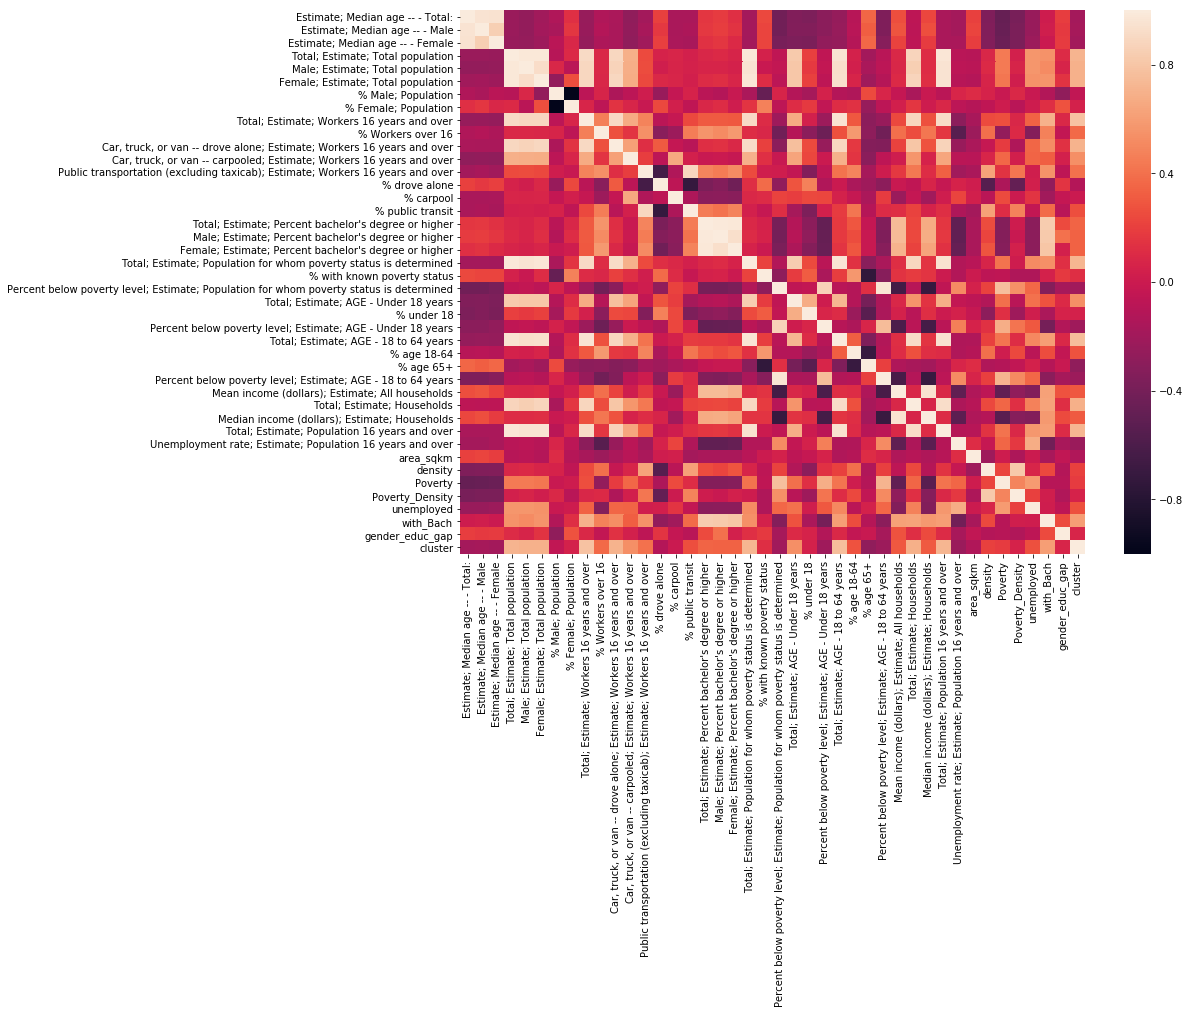

In [21]:
# Seaborn Version
# Heat map: correlation
Fig, ax = plt.subplots(figsize=(14,10))
hm = sns.heatmap(df_corr, yticklabels=df_corr.columns.values, xticklabels=df_corr.columns.values)
plt.show()

In [22]:
# Bokeh Version
# Heat map: correlation
from math import pi

from bokeh.models import (
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
)

#data['Year'] = data['Year'].astype(str)
#data = data.set_index('Year')
#data.drop('Annual', axis=1, inplace=True)
#data.columns.name = 'Month'

#years = list(data.index)
#months = list(data.columns)

# reshape to 1D array or rates with a month and year for each row.
#df = pd.DataFrame(data.stack(), columns=['rate']).reset_index()

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=df_corr.values.min(), high=df_corr.values.max())

source = ColumnDataSource(df_corr)

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title="Correlation Matrix",
           x_range=df_corr.columns.values, y_range=df_corr.columns.values,
           x_axis_location="above", plot_width=1200, plot_height=1200,
           tools=TOOLS, toolbar_location='below')

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x=df_corr.columns.values, y=df_corr.columns.values, width=1, height=1,
       #source=source,
       #fill_color={'field': 'rate', 'transform': mapper},
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

p.select_one(HoverTool).tooltips = [
     ('date', '@Month @Year'),
     ('rate', '@rate%'),
]

#show(p)      # show the plot

### Mean Income and its Correlations
Before diving into the importance of density, let's take a look at factors that correlate with income.
<p><div style="text-align: justify">
Looking at the correlation bar chart below, mean income has obvious high correlations with factors such as education, poverty, and unemployment. These are the relationships that affect typical economic development policy, and yet problems still persist. What is not readily recognized is that the problem is more complicated than that. </div></p>

Let us now isolate population density and its relationship to other factors.

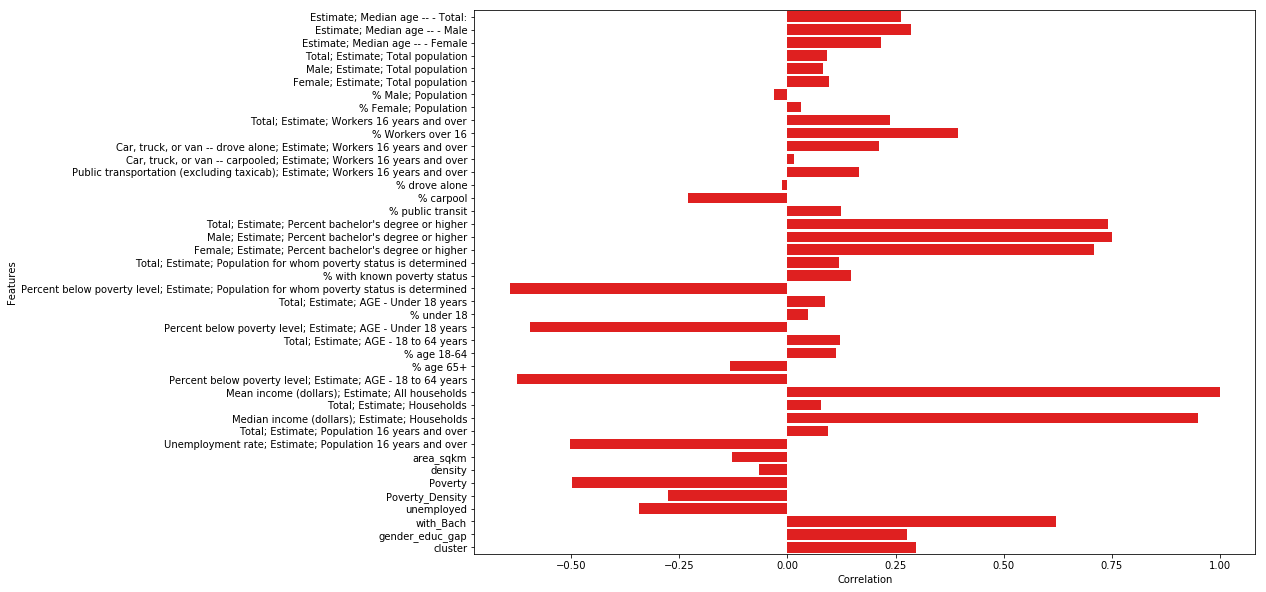

In [23]:
# Correlation with Mean Income
Fig, ax = plt.subplots(figsize=(14,10))
target_meanincome = pd.DataFrame(df_corr.iloc[29,:]).reset_index()#target_corr
incbar = sns.barplot(x='Mean income (dollars); Estimate; All households', y='index', data=target_meanincome, color='r')
incbar.set(ylabel='Features',xlabel='Correlation')
plt.show()

### Population Density and its Correlations
<p><div style="text-align: justify">
Looking at the chart from top to bottom, we can see that denser populations should have a younger population. As already illustrated earlier in our analysis, it does not have a strong correlation with population mass alone. It has a strong effect on preferred modes of transportation, as density has a considerable negative correlation with driving alone and an undeniable positive correlation with use of public transportation. As can be expected, there is a very strong positive correlation with poverty density. Other than that, it seems to be slightly related to lower incomes and more unemployed.  
</div></p>

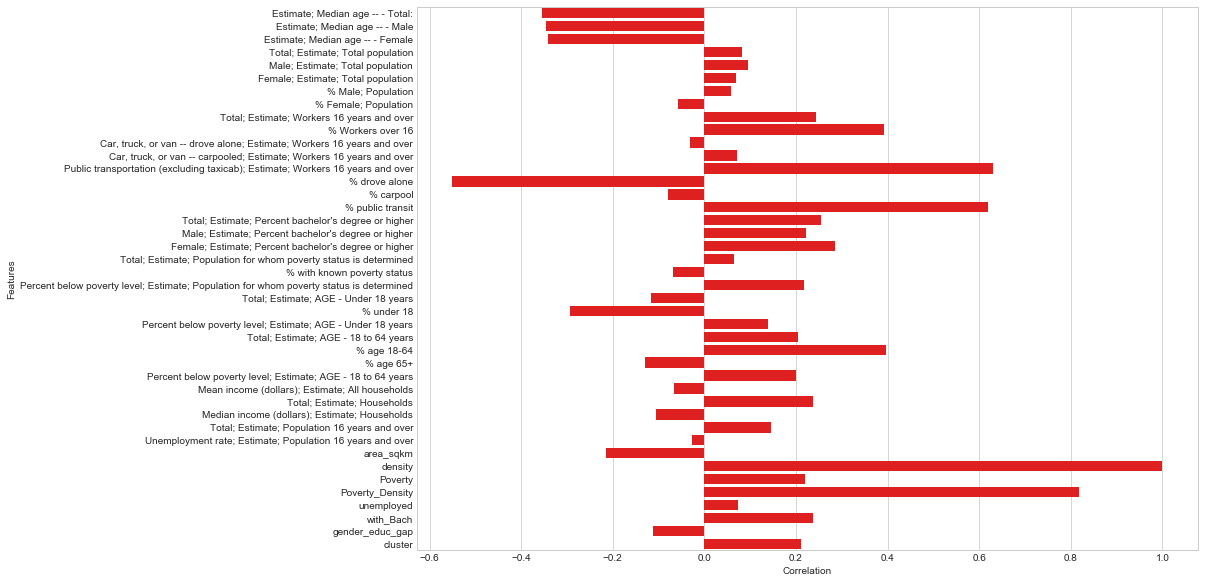

In [24]:
# Correlation with Density
sns.set_style("whitegrid")
Fig, ax = plt.subplots(figsize=(14,10))
target_density = pd.DataFrame(df_corr.loc['density',:]).reset_index()#target_corr
denbar = sns.barplot(x='density', y='index', data=target_density, color='r')
denbar.set(ylabel='Features',xlabel='Correlation')
plt.show()

<a id="pear"></a>
### Pearson r correlation: Density vs. Poverty and Unemployment Rates
>**Density and poverty rate** have a rather **weak positive (+) correlation**.  
(0.2180)  


>**Density and unemployment rate** have a **very weak negative (-) correlation**. 
(-0.0260)  

Using scatter plots, we can see that visually our GEOIDs together barely resemble the best-fit lines. 

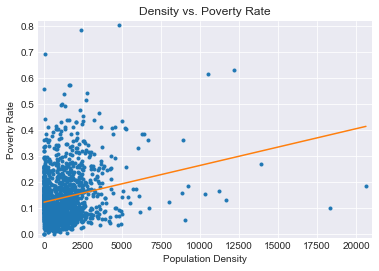

Correlation Coefficient: 0.2180172846724232


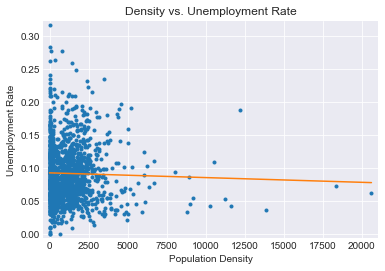

Correlation Coefficient: -0.025967116643440633


In [25]:
from scipy.stats import pearsonr
sns.set_style("darkgrid")

# Linear regression: Density versus Poverty Rate
X = df.loc[:,'density'].values
y = df.loc[:,'Percent below poverty level; Estimate; Population for whom poverty status is determined'].values

plt.plot(X, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Population Density')
plt.ylabel('Poverty Rate')

# Linear regression
a, b = np.polyfit(X, y, 1)
# Best fit line
x = np.array([min(X),max(X)])
Y = a * x + b
plt.plot(x, Y)
plt.title("Density vs. Poverty Rate")
plt.show()
corrcoefficient, p_value = pearsonr(X, y)
print("Correlation Coefficient: {}".format(corrcoefficient))

# Linear regression: Density versus Unemployment Rate
X = df.loc[:,'density'].values
y = df.loc[:,'Unemployment rate; Estimate; Population 16 years and over'].values

plt.plot(X, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Population Density')
plt.ylabel('Unemployment Rate')

# Linear regression
a, b = np.polyfit(X, y, 1)
# Best fit line
x = np.array([min(X),max(X)])
Y = a * x + b
plt.plot(x, Y)
plt.title("Density vs. Unemployment Rate")
plt.show()
corrcoefficient, p_value = pearsonr(X, y)
print("Correlation Coefficient: {}".format(corrcoefficient))

<a id="lin"></a>
### Linear Regression Predictor: Density and Mean Income
<p><div style="text-align: justify"> 
Now, let us try using population density as a linear model predictor for mean income. We use scikit-learn's Linear Regression supervised machine learning model and evaluate its predictive performance by computing the **r-squared**, which is the default scoring method for linear regression. It is a quantification of the amount of variance in the target variable predicted from the feature variables or predictors.
</div></p>

**Result:**  
Even if the R-squared is low, the value is negative. This means that it fits worse than a horizontal line. **Density alone is very bad as a predictor for income.**

In [26]:
# Supervised Learning: Regression: Density vs. Mean Income
from sklearn.linear_model import LinearRegression
X = df.loc[:,'density'].values
y = df.loc[:,'Mean income (dollars); Estimate; All households'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=69)
reg = LinearRegression()
y_train_2d = y_train.reshape(-1, 1)
X_train_2d = X_train.reshape(-1,1)


from matplotlib.figure import Figure
reg = reg.fit(X_train_2d, y_train_2d)
#pred_space = np.linspace(min(X_train_2d), max(X_train_2d)).reshape(1, -1)
DenvsInc_Reg = fig("Linear Regression: Density vs. Mean Income", "Population Density", "Mean Income")
DenvsInc_Reg.circle(X_train, y_train, size=7, alpha=0.5, color='firebrick')
pred = reg.predict(X_train_2d).flatten()
DenvsInc_Reg.line(X_train, pred)
show(DenvsInc_Reg)

# testing the linear regression model
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test.reshape(-1,1))
print("R^2: {}".format(reg.score(X_test.reshape(-1,1), y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.007192403770710287
Root Mean Squared Error: 29823.177091783487


<a id="lowhi"></a>
# Comparing Low-density and High-density Cases
<p><div style="text-align: justify"> 
Now let's find out if the extreme cases of population density on both ends of the spectrum differ when it comes to poverty rate and unemployment rate. A quick look at the distributions should give us an idea.  </div></p>
<p><div style="text-align: justify"> 
Using swarm plots, we can see that distributions of poverty rates and unemployment rates among low-density and high-density cases have roughly the same shape, but they're not exactly the same.  </div></p>
<p><div style="text-align: justify"> 
A powerful way to test similarity or difference of distributions is finding the "true" test statistic by generating replicates of the original dataset and comparing their statistics with what was observed in the actual data.   </div></p>

<span style="font-size:20px"><strong><span style="color:#b22222">
Null Hypothesis:   
    </span></strong></span> 
**Low-density and high-density cases have similar distributions.**

Low-density bin - Max Density: 349.7889015101495
High-density bin - Minimum Density: 1420.956092746414


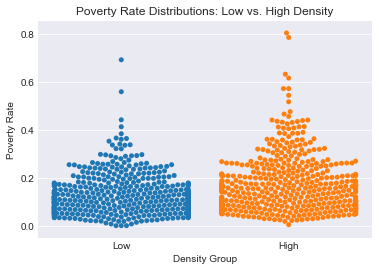

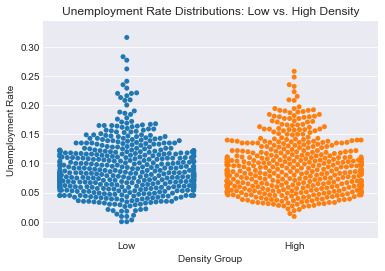

In [27]:
# Isolating low-density and high-density GEOIDs
low_dens = df.loc[df['density_group'] == "Low",["density_group",
                                                "Percent below poverty level; Estimate; Population for whom poverty status is determined",
                                                "Unemployment rate; Estimate; Population 16 years and over"]]
low_dens.columns = ["density_group","poverty_rate","unemployment_rate"]
high_dens = df.loc[df['density_group'] == "High",["density_group",
                                                  "Percent below poverty level; Estimate; Population for whom poverty status is determined",
                                                  "Unemployment rate; Estimate; Population 16 years and over"]]
high_dens.columns = ["density_group","poverty_rate","unemployment_rate"]
den_data = low_dens.append(high_dens)
print("Low-density bin - Max Density: {}".format(max(df.loc[df['density_group'] == "Low","density"])))
print("High-density bin - Minimum Density: {}".format(min(df.loc[df['density_group'] == "High","density"])))

# Swarmplot: Poverty Rate Distribution
eda = sns.swarmplot(x='density_group',y='poverty_rate',data=den_data)
eda = plt.xlabel('Density Group')
eda = plt.ylabel('Poverty Rate')
eda = plt.title('Poverty Rate Distributions: Low vs. High Density')
plt.show()

# Swarmplot: Unemlpoyment Rate Distribution
eda2 = sns.swarmplot(x='density_group',y='unemployment_rate',data=den_data)
eda2 = plt.xlabel('Density Group')
eda2 = plt.ylabel('Unemployment Rate')
eda2 = plt.title('Unemployment Rate Distributions: Low vs. High Density')
plt.show()

<a id="perm"></a>
# Hacker Statistics: Permutation Test for Identical Distributions
<p><div style="text-align: justify"> 
Permutation sampling is combining cases split between categories, disregarding the original categories, scrambling the cases, and then splitting them again into groups similar in size to the original ones. The basic idea is to repeatedly generate samples that assume that the **null hypothesis** is true, which is that both distributions are the same. This scenario is then tested against a metric that somehow provides a sense of the original distributions. In our case, our **test statistic** is the difference between the means of the low-density group and the high-density group. How the permutation samples is compared depends on the observed test statistic. In our case, since the difference between the means is negative (-), we are performing a left-tailed test. This test produces a score based on the proportion of permutation replicates having a test statistic (difference of means) less than or equal to (because it is a left-tailed test) the observed test statistic. This score is called the **p-value**. With a **confidence interval** of 95%, our **alpha** is 0.05. If the p-value is less than the alpha, then it indicates **statistical significance**, which calls for the rejection of the null hypothesis.
</div></p>

### Permutation Test Results:

> The permutation test for distributions of **poverty rates** confirms that low-density and high-density GEOIDs have considerably **different distributions**.  
(_Reject Null Hypothesis_)    

> The permutation test for distributions of **unemployment rates** indicates that low-density and high-density GEOIDs have considerably **similar distributions**.  
(_Keep Null Hypothesis_)    

<p><div style="text-align: justify"> 
The disparity between the distributions might also indicate that simply increasing employment does not reduce poverty. We must remember, however, that our tests completely ignore GEOIDs with densities between 350 persons/sqkm and 1421 persons/sqkm.  </div></p>

In [28]:

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Define the test statistic function: difference of means
def difference_of_means(d1, d2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    difference = np.mean(d1) - np.mean(d2)

    return difference

# Define function for generating permutation replicates + visuals
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
        # Compute ECDFs
        x_1, y_1 = ecdf(perm_sample_1)
        x_2, y_2 = ecdf(perm_sample_2)

        # Plot ECDFs of permutation sample
        _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='dodgerblue', alpha=0.02)
        _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='coral', alpha=0.02)
    
    # Create and plot ECDFs from original data
    x_1, y_1 = ecdf(data_1)
    x_2, y_2 = ecdf(data_2)
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='dodgerblue')
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='coral')    
    
    return perm_replicates, _

# prepare legend
import matplotlib.patches as mpatches
blue_patch = mpatches.Circle((1,2),color='dodgerblue', label='Low-density')
orange_patch = mpatches.Circle((1,2),color='coral', label='High-density')

Observed Test Statistic - Difference of Means: -0.04246293909950771
Poverty Rate Distribution Experiment: p-value = 0.0


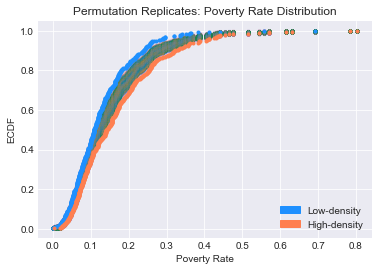

In [29]:
# Compute difference of mean poverty rate
empirical_diff_means = difference_of_means(low_dens.poverty_rate, high_dens.poverty_rate)
print("Observed Test Statistic - Difference of Means: {}".format(empirical_diff_means))

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates, _ = draw_perm_reps(low_dens.poverty_rate, high_dens.poverty_rate,
                                 difference_of_means, size=1000)
# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)


# Print and plot the result
print('Poverty Rate Distribution Experiment: p-value = {}'.format(p))
plt.xlabel('Poverty Rate')
plt.ylabel('ECDF')
plt.title('Permutation Replicates: Poverty Rate Distribution')
plt.legend(handles=[blue_patch, orange_patch], loc='lower right')
plt.show()

Observed Test Statistic - Difference of Means: -0.0011244340781594725
Unemployment Rate Distribution Experiment: p-value = 0.366


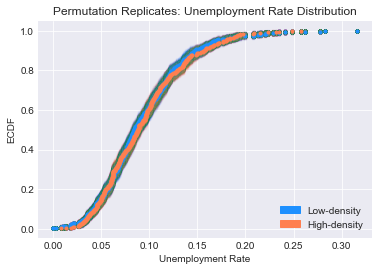

In [30]:
# Compute difference of mean unemployment rate
empirical_diff_means = difference_of_means(low_dens.unemployment_rate, high_dens.unemployment_rate)
print("Observed Test Statistic - Difference of Means: {}".format(empirical_diff_means))

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates, _ = draw_perm_reps(low_dens.unemployment_rate, high_dens.unemployment_rate,
                                 difference_of_means, size=1000)
# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
# Print the result
print('Unemployment Rate Distribution Experiment: p-value = {}'.format(p))
plt.xlabel('Unemployment Rate')
plt.ylabel('ECDF')
plt.title('Permutation Replicates: Unemployment Rate Distribution')
plt.legend(handles=[blue_patch, orange_patch], loc='lower right')
plt.show()

<a id="boot"></a>
# Hacker Statistics: Bootstrap Test for Identical Distributions
<p><div style="text-align: justify"> 
Bootstrap sampling is another form of resampling method that not only reshuffles the individual cases between groups, but allows for repeat cases. This method allows for a greater occurence of some values in some replicates. This also means that since it allows for more extreme values to occur more often, statistical significance is gained when proportion of replicates with test statistics MORE than the observed test statistic is less than the alpha (0.05).  
</div></p>

### Bootstrap Test Results:

> The bootstrap test for distributions of **poverty rates** confirms that low-density and high-density GEOIDs have considerably **different distributions**.  
(_Reject Null Hypothesis_)

> The bootstrap test for distributions of **unemployment rates** indicates that low-density and high-density GEOIDs have considerably **similar distributions**.  
(_Keep Null Hypothesis_)

In [31]:
def bootstrap_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate data
    data_concat = np.concatenate((data1, data2))

    # Bootstrap the concatenated array
    bootstrapped_data = np.random.choice(data_concat, size=len(data_concat))

    # Split the permuted array into two
    bs_sample_1 = bootstrapped_data[:len(data1)]
    bs_sample_2 = bootstrapped_data[len(data1):]

    return bs_sample_1, bs_sample_2

# Defining the function for drawing bootstrap replicates
def draw_bs_replicates(data_1, data_2, func, size=1):

    
    # Initialize bootstrap replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    for i in range(size):
        # Generate Bootstrap samples
        bs_sample_1, bs_sample_2 = bootstrap_sample(data_1, data_2)
        
        # Compute replicate
        bs_replicates[i] = func(bs_sample_1, bs_sample_2)

        # Compute ECDFs
        x_1, y_1 = ecdf(bs_sample_1)
        x_2, y_2 = ecdf(bs_sample_2)

        # Plot ECDFs of permutation sample
        _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='dodgerblue', alpha=0.02)
        _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='coral', alpha=0.02)
    
    # Create and plot ECDFs from original data
    x_1, y_1 = ecdf(data_1)
    x_2, y_2 = ecdf(data_2)
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='dodgerblue')
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='coral')
    
    return bs_replicates, _

Observed Test Statistic - Difference of Means: -0.04246293909950771
Poverty Rate Distribution Experiment: p-value = 0.0


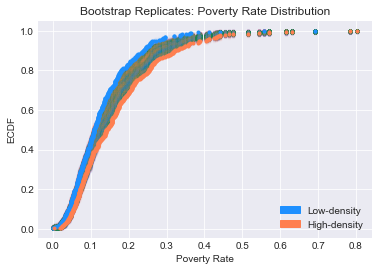

In [32]:
# Compute difference of mean poverty rate
empirical_diff_means = difference_of_means(low_dens.poverty_rate, high_dens.poverty_rate)
print("Observed Test Statistic - Difference of Means: {}".format(empirical_diff_means))

# Draw bootstrap replicates
bs_replicates, _ = draw_bs_replicates(low_dens.poverty_rate, high_dens.poverty_rate,
                                      difference_of_means, size=1000)
        
# Compute and print p-value: p
p = np.sum(empirical_diff_means >= bs_replicates) / len(bs_replicates)

print('Poverty Rate Distribution Experiment: p-value = {}'.format(p))
plt.xlabel('Poverty Rate')
plt.ylabel('ECDF')
plt.title('Bootstrap Replicates: Poverty Rate Distribution')
plt.legend(handles=[blue_patch, orange_patch], loc='lower right')
plt.show()

Observed Test Statistic - Difference of Means: -0.0011244340781594725
Unemployment Rate Distribution Experiment: p-value = 0.352


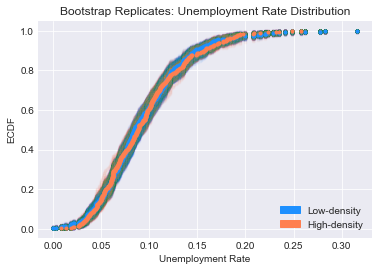

In [33]:
# Compute difference of mean unemployment rate
empirical_diff_means = difference_of_means(low_dens.unemployment_rate, high_dens.unemployment_rate)
print("Observed Test Statistic - Difference of Means: {}".format(empirical_diff_means))

# Draw bootstrap replicates
bs_replicates, _ = draw_bs_replicates(low_dens.unemployment_rate, high_dens.unemployment_rate,
                                      difference_of_means, size=1000)
        
# Compute and print p-value: p
p = np.sum(empirical_diff_means >= bs_replicates) / len(bs_replicates)
print('Unemployment Rate Distribution Experiment: p-value = {}'.format(p))
plt.xlabel('Unemployment Rate')
plt.ylabel('ECDF')
plt.title('Bootstrap Replicates: Unemployment Rate Distribution')
plt.legend(handles=[blue_patch, orange_patch], loc='lower right')
plt.show()

<a id="conc"></a>

<span style="font-size:30px"><strong><span style="color:#b22222">
Conclusion on Density     
    </span></strong></span> 
<p><div style="text-align: justify"> 
The results of the bootstrap tests are consistent with the results of the permutation tests. _Notice that the results of these tests are not outright consistent with what our earlier clustering suggests, particularly when it comes to poverty rates._ **This probably means that conditions on the extremes on both ends of population density do not necessarily match the trends displayed by aggregated state data.** Chances are, this could be because of poverty distribution in **suburban** areas, which will be discussed next. This calls for analysis of a **thoughtfully segmented population** as the pros and cons of densification are hidden by aggregation of data.  
   </div></p>

<p><div style="text-align: justify"> 
Finally, we can see that , **statistically, population density does not provide a clear and direct goal for solving inequality and reducing poverty**. Unlike education, simply increasing density does not lead to poverty reduction or income improvement.  
</div></p>

Instead, **what density provides is context necessary to targeted policy-making**.  

<a id="pol"></a>

<img src="https://imgur.com/tOYggCB.png">
# Policy Implications: Why is density important, then?

<p><div style="text-align: justify">
Using census block groups, as provided in the data, instead of aggregate statistics, lends more visibility to unique circumstances contributing to the conditions associated with poverty within local jurisdictions ([Bishop and Tinsely](https://files.eric.ed.gov/fulltext/EJ1093003.pdf), 2006). When data is aggretgated at a city or county level, concentrations of poverty are essentially masked. The census bureau, for example, in hopes of reducing poverty in Georgia, formulated a typology for understanding poverty within the state of Georgia. The **typology** is based on population mass and density. It is a step towards understanding where poverty exists and what it looks like. It helps to **focus attention on where people live rather than generic geopolitical boundaries**. Looking at density while using a smaller unit of analysis allows research to account for geographic or cost-of-living differences. Being able to see these differences allows for the development of a targeted economic development policy. 
</div></p>

<p><div style="text-align: justify">
Our Hacker Statistics tests only compared two subgroups: low-density GEOIDs (density &lt; 349.79) and high-density GEOIDs (density &gt; 1420.96). GEOIDs with densities between these values are not accounted for. We cannot simply apply the same typology used by the Census Bureau in Georgia. **The density value thresholds of subgroups in a new typology for Washington must be specific to Washington.** The subgroups must reflect real-world conditions, and thus must be products of careful examination out in the field.  </div></p>

<p><div style="text-align: justify">
As an example, take a look at Georgia, where poverty is unevenly distributed across space. It is concentrated in inner-cities and rural places. **Poverty rates are disproportionately lower in suburban areas**. Smaller cities bear a disproportionate burden of poverty, being home to higher concentrations of poor than in unincorporated and rural places of the state. This worsens are their workforce migrates to employment centers located in metropolitan areas. In these areas, **the lack of investment in commercial and retail establishments worsen poverty:**  </div></p>
* Basic commodities are higher due to the absence of supermarkets.
* Predatory lending prevails because banks and investment firms do not locate in stressed areas
- Since many are not covered by employer-sponsored health benefits, many are forced to health care based on emergency room visits, which further strains financial conditions of their hospitals.
- While employment centers are being located father away from stressed areas, owning an automobile far from the city centers is cost-prohibitive and there is no ready access to public transportation.  

Most notable are the **effects on housing for the poor**, which is explained next.

<span style="font-size:25px"><strong><span style="color:#b22222">
Closer Look: Densification and Housing     
    </span></strong></span> 
<p><div style="text-align: justify"> 
With regards to the housing market, Christine Whitehead of the  London School of Economics and Cambridge Centre for Housing and Planning Research differentiates between planning density and actual density in her analysis of density in London's housing market. **Planning density**, associated with the supply side, is a regulatory requirement based on a planning system by which the state controls what may be provided. Defined either in terms of number of units or habitable rooms per hectare, these requirementes have a direct impact on the types of dwellings provided but cannot determine who actually lives in the dwellings. **Actual density** is what happens on the ground in the form of the population living in the housing - the ones who use the housing and services provided (transport facilities, open space, communal areas, schools, health and leisure services, etc.). Important to planning decisions is **determining what is desirable given the nature of local environment and existing services**. One major factor is **public transportation accessibility**.  

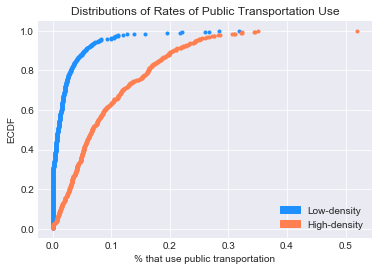

In [34]:
# plotting transportation distributions
low_den_transpo = df.loc[df.density_group == "Low", '% public transit']
high_den_transpo = df.loc[df.density_group == "High", '% public transit']
x_1, y_1 = ecdf(low_den_transpo)
x_2, y_2 = ecdf(high_den_transpo)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='dodgerblue')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='coral')
plt.xlabel('% that use public transportation')
plt.ylabel('ECDF')
plt.title('Distributions of Rates of Public Transportation Use')
plt.legend(handles=[blue_patch, orange_patch], loc='lower right')
plt.show()

<p><div style="text-align: justify">
Higher densities can generate more efficient and acceptable public transport, but technology may also enable efficiency lower-density provision. Such consideration must be included in policy formation.   </div></p>  

<p><div style="text-align: justify">
Actual density, as an outcome of demand, is more complicated that it would initially seem. While our data suggests that higher density is related to higher incomes, what is hidden by the aggregation is how the relationship between income and density actually works. **As incomes and wealth rise, people increasingly want to live separately**, each of them demanding more space, leading to:  </div></p>

* More households forming from a given population
* Average size of households falling

<p><div style="text-align: justify">
The implication: **Actual densities fall as economic growth leads to increased demand.** In a supply-constrained system, house prices will have to rise to constrain demand to the amount of housing and availability of external space.  </div></p>

<p><div style="text-align: justify">
**Given income inequality, it will be more difficult for low-income households to achieve defined housing standards as affordability falls.** As a response to the rise in demand, lands being developed, but **higher densities for new developments are perceived as putting pressure on services available to established households in that area** due to the tension between expanding supply and maintaining local community satisfaction:  </div></p>

* Well-organized agglomerations with diverse activities increase productivity and improve competitiveness of the economy.  
* Extension and urban crawl inefficiently adds to demands for infrastructure services in outer areas and leaves existing infrastructure underused.  

<p><div style="text-align: justify">
The role of planners is therefore to take into account these spillover effects and address other market failures by providing more accurate information for all stakeholders and ensuring the adequate provision of public goods and services. Most important to our cause is to ensure that there is **adequate residential land for all income groups**. They must also seek to control urban sprawl to help maintain the viability of inner areas (by maintaining adequate population densities in the face of pressures to live at much lower densities than originally intended when the dwellings were built) and putting pressure on land and housing prices. For this to be desirable, the benefits of regulation and constraint should be great enough to offset the costs to individual consumers.  </div></p>

<p><div style="text-align: justify">
Remember that the main goal is to battle inequality. While density is largely driven by the demand side, policy-makers and planners must not let the market be driven solely by those with high income, as it worsens conditions for those with lower income. Urban sprawl led by the private sector requires creation of new public services, leaving inner city areas undeveloped and making outer city areas more expensive. **For our re-election campaign, housing planning must help fight inequality without wholly jeopardizing middle-class interests as the population is largely middle class.**   </div></p>

<a id="rec"></a>
# Additional Data Recommendations

<span style="font-size:20px"><strong><span style="color:#b22222">
Time series data  
    </span></strong></span> 
Time series data would allow us to detect specific trends in Washington's history that lead to growth. Multivariate time series data, for example, would reveal links or dependencies between key factors or industries.  

<span style="font-size:20px"><strong><span style="color:#b22222">
Data for measuring inequality  
    </span></strong></span> 
Data that allows the measurement of income inequality (GINI coefficient) should be made available in order to get a more detailed picture of the situation that would let us more directly tackle the problem of inequality.  

<span style="font-size:20px"><strong><span style="color:#b22222">
Crime statistics  
    </span></strong></span> 
This would allow an informed plan to combat crime in a less reactionary manner. Paired with the rest of the data (especially time series data), it would help shed light on the deeper causes of crime. epidemics.  

<span style="font-size:20px"><strong><span style="color:#b22222">
Climate data  
    </span></strong></span> 
Economic development policy formulation can largely benefit from climate data, as the feasibility of heavily-profitable industries can be dependent on an area's climate.  

<span style="font-size:20px"><strong><span style="color:#b22222">
Housing market data   
    </span></strong></span> 
Housing market fluctuations heavily affects the less fortunate as they are the ones less able to adapt to inflation.  

<span style="font-size:20px"><strong><span style="color:#b22222">
Industry sector data + available jobs  
    </span></strong></span> 
Paired with geography, such data is essential to the formulation of a tangible economic plan.  

<a id="pca"></a>
# How about Principal Component Analysis (PCA)?
<p><div style="text-align: justify">
Principal Component Analysis (PCA) is another dimension reduction technique. It decorrelates data by aligning the data with the axes, shifting data samples so that have a mean of 0. It does not discard data. Instead, the data is condensed into a smaller set of new dimensions, with a minimum loss function.  
</div></p>

**Its goals are:  **
1. To look for properties that show as much variation across instances as possible
2. To look for properties that allow to predict or "reconstruct" the original characteristics  

In doing this, it effectively **_reduces statistical noise_**, or unexplained variations in the sample.  

### Why wasn't it used?
<p><div style="text-align: justify">
When PCA is applied to this particular dataset before applying the k-means clustering, the results of the clustering end up making the two clusters almost identical when it comes to its features. The instances belonging to each cluster end up spread evenly along the entire crescent shape of our t-SNE plot. It drastically reduced the differences in the distribution of density groups and made the distributions of other categorical variables end up looking too similar.
</div></p>

**_It practically made the clustered data useless._**


<a id="sum"></a>
# Summary
* East and West Washington have mostly different geographies, but the dichotomy remains more of a political divide between conservatives and liberals.  
* Unsupervised machine learning gives us two clusters that emphasize differences in density, unemployment and poverty when the East and West divide is ignored.  
- Our re-election campaign strategy can either take into heavy consideration the East and West political divides or prioritize density differences between the Urban and the Rural, while either promoting new centers of growth or reinforcing existing industries where they are currently located.  
- Isolating the more extreme cases of population density and comparing their unemployment and poverty statistics reveals inconsistencies with analyses that include all and suggests that aggregated data hides trends.  
- The degree of population density itself does not provide a guide for achieving our targets (improving income, reducing poverty and unemployment). Instead, it serves as context, the knowledge of which is necessary for effective policy-making.  
- Policy-makers must consider the effects of expansion and density reduction caused by improvement of income, especially the adverse effects to the lower-income households.  

<a id="sour"></a>
# Sources
Explanations and illustrations of machine learning techniques were from:
1. [Datacamp](https://www.datacamp.com/)
2. [Data Science for Business by Foster Provost and Tom Fawcett](https://www.amazon.co.uk/Data-Science-Business-data-analytic-thinking/dp/1449361323)

Tinsely, Karen and Bishop, Matt (2006). [Poverty and Population Density: Implications for Economic Development Policy](https://files.eric.ed.gov/fulltext/EJ1093003.pdf).

Whitehead, Christine. [The Density Debate](http://eprints.lse.ac.uk/63375/1/whitehead_the_density_debate_author.pdf).  